In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [5]:
crime = pd.read_csv("./data/pop_town.csv", encoding="cp949")

In [6]:
crime.head()

,Unnamed: 0,시도명,시군구명,읍면동명,계,0세남자,1세남자,2세남자,3세남자,4세남자,...,101세여자,102세여자,103세여자,104세여자,105세여자,106세여자,107세여자,108세여자,109세여자,110세이상 여자
0,0,서울특별시,종로구,청운동,2274,4,4,5,4,8,...,0,1,0,0,0,0,0,0,0,0
1,1,서울특별시,종로구,신교동,1341,0,2,1,5,2,...,0,0,0,0,0,0,0,0,0,0
2,2,서울특별시,종로구,궁정동,217,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,서울특별시,종로구,효자동,568,2,3,1,2,1,...,0,0,0,0,0,0,0,0,0,0
4,4,서울특별시,종로구,창성동,404,1,0,1,0,2,...,1,0,0,0,0,0,0,0,0,0


In [3]:
crime = pd.read_csv("./data/safety/concat_data_safe.csv", encoding="utf-8")

#### 강력범죄만 합치기

In [8]:
crime["brutal_crime"] = crime["murder_crime"] + crime["sex_crime"] + crime["violence_crime"]

In [9]:
crime

,county_name,total_crime,murder_crime,sex_crime,violence_crime,town_name,pop_total,men_2030,women_2030,cctv_num,light_num,house_num,police_num,brutal_crime
0,광진구,3619,6,230,1713,중곡동,78943,12444,13315,800,2915,3,4,1949
1,광진구,3619,6,230,1713,능동,11081,2081,2600,189,421,0,0,1949
2,광진구,3619,6,230,1713,구의동,76600,11855,12926,704,1705,1,1,1949
3,광진구,3619,6,230,1713,광장동,33965,3406,3723,200,232,1,1,1949
4,광진구,3619,6,230,1713,자양동,92572,14164,14348,804,2354,4,3,1949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,강남구,6947,12,667,3762,자곡동,27340,3420,4475,137,0,1,0,4441
441,강남구,6947,12,667,3762,율현동,3792,506,476,88,3,0,0,4441
442,강남구,6947,12,667,3762,일원동,47813,5896,6126,424,290,1,1,4441
443,강남구,6947,12,667,3762,수서동,21806,2337,2471,232,83,0,1,4441


In [10]:
df_crime = crime.groupby('county_name').agg({
                       'pop_total': 'sum',
                        'house_num' : 'sum', 
                        'police_num' : 'sum',
                        'total_crime' : 'mean',
                        'brutal_crime' : 'mean',
                        'cctv_num' : 'sum',
                        'light_num' : 'sum'
                      })

In [13]:
df_crime = df_crime.astype({'total_crime':int,
                'brutal_crime':int,
               })

In [15]:
df_crime.reset_index(drop=False, inplace=True)

In [22]:
df_crime

,county_name,pop_total,house_num,police_num,total_crime,brutal_crime,cctv_num,light_num,Subtotal
0,강남구,549154,112,14,6947,4441,6814,10210,39497597.1
1,강동구,459389,43,9,3711,2034,2541,7503,24590382.7
2,강북구,287490,25,9,2832,1955,2757,9776,23600408.1
3,강서구,562528,36,11,4663,2665,2431,8635,41451953.9
4,관악구,481872,53,9,4879,2904,4624,12401,29568368.9
5,광진구,335335,15,10,3619,1949,3134,8971,17062820.1
6,구로구,392311,31,8,3857,2284,4290,8015,20122908.3
7,금천구,227457,9,5,2577,1456,2400,6269,13020527.6
8,노원구,497237,27,8,3896,2389,1991,5288,35439122.0
9,도봉구,306722,0,7,2141,1172,1395,6334,20651010.0


In [18]:
area = pd.read_csv("./data/county_area.csv")
area

,city_name,county_name,town_name,Subtotal,Field,Paddy,Orchard,Ranch,Forest,Mineral_Spring_Area,...,Reservoir,Fish_Farm,Waterworks_Site,Park,Sports_Site,Amusement_Park,Religious_Site,Historic_Site,Cemetery,Miscellaneous_Land
0,서울시,종로구,신교동,99144.0,-,-,-,-,6344.3,-,...,-,-,-,3888.6,-,-,342.8,88.5,-,-
1,서울시,종로구,누상동,261803.6,-,-,-,-,187452.2,-,...,-,-,-,-,-,-,-,-,-,-
2,서울시,종로구,옥인동,414842.7,-,-,-,-,225416.2,-,...,-,-,-,47088.2,-,-,-,-,-,-
3,서울시,종로구,필운동,86207.7,-,-,-,-,9809,-,...,-,-,-,-,-,-,2551.2,-,-,-
4,서울시,종로구,사직동,284141.8,-,-,-,-,79726.2,-,...,-,-,-,22991.7,-,-,-,43586.8,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,서울시,서초구,잠원동,3035875.4,53,-,-,-,-,-,...,-,-,-,42967.5,-,-,3817.7,-,-,42558.1
463,서울시,강남구,삼성동,3193589.8,-,-,-,-,-,-,...,-,-,15770.7,252248.6,-,-,67064.7,-,-,-
464,서울시,강남구,압구정동,2685131.5,-,-,-,-,-,-,...,-,-,-,47470.7,-,-,-,-,-,2051.1
465,서울시,송파구,신천동,4346310.8,-,-,-,-,-,-,...,30264,-,-,151777.3,-,-,793.5,-,-,-


In [19]:
area = area.groupby('county_name').agg({
                       'Subtotal': 'sum'
                      })

In [20]:
area

,Subtotal
county_name,
강남구,39497597.1
강동구,24590382.7
강북구,23600408.1
강서구,41451953.9
관악구,29568368.9
광진구,17062820.1
구로구,20122908.3
금천구,13020527.6
노원구,35439122.0


In [21]:
df_crime = pd.merge(df_crime, area, on="county_name", how="left")

## 인구/면적/소득 살펴보기

In [32]:
df = pd.read_csv("./data/safety/crime_pop_ratio.csv", encoding="utf-8")

In [33]:
df.head()

,county_name,women_2030,pop_total,sex_crime,not_sex_crime,2030_pop,crime_pop_ratio,crime_pop23_ratio,sex_crime_pop_ratio,sex_crime_women_pop23_ratio,crime_women_pop23_ratio
0,강남구,77955,549154,667,6280,146815,0.011436,0.042775,0.011436,0.080559,0.080559
1,강동구,63912,459389,157,3554,124894,0.007736,0.028456,0.007736,0.055608,0.055608
2,강북구,36353,287490,177,2655,72830,0.009235,0.036455,0.009235,0.073034,0.073034
3,강서구,91473,562528,261,4402,175231,0.007825,0.025121,0.007825,0.048123,0.048123
4,관악구,94240,481872,327,4552,195802,0.009446,0.023248,0.009446,0.048302,0.048302


In [34]:
sorted_df = df.sort_values(by='women_2030', ascending=False)

In [35]:
sorted_df

,county_name,women_2030,pop_total,sex_crime,not_sex_crime,2030_pop,crime_pop_ratio,crime_pop23_ratio,sex_crime_pop_ratio,sex_crime_women_pop23_ratio,crime_women_pop23_ratio
17,송파구,99450,653989,290,4877,189233,0.007457,0.025772,0.007457,0.049040,0.049040
4,관악구,94240,481872,327,4552,195802,0.009446,0.023248,0.009446,0.048302,0.048302
3,강서구,91473,562528,261,4402,175231,0.007825,0.025121,0.007825,0.048123,0.048123
0,강남구,77955,549154,667,6280,146815,0.011436,0.042775,0.011436,0.080559,0.080559
21,은평구,66836,466474,176,3311,127901,0.007098,0.025887,0.007098,0.049539,0.049539
12,마포구,66470,362234,436,3660,122139,0.010104,0.029966,0.010104,0.055062,0.055062
19,영등포구,66291,374985,327,4492,128112,0.011979,0.035063,0.011979,0.067762,0.067762
1,강동구,63912,459389,157,3554,124894,0.007736,0.028456,0.007736,0.055608,0.055608
8,노원구,62865,497237,180,3716,126849,0.007473,0.029295,0.007473,0.059111,0.059111
11,동작구,62197,378360,212,2523,123213,0.006668,0.020477,0.006668,0.040565,0.040565


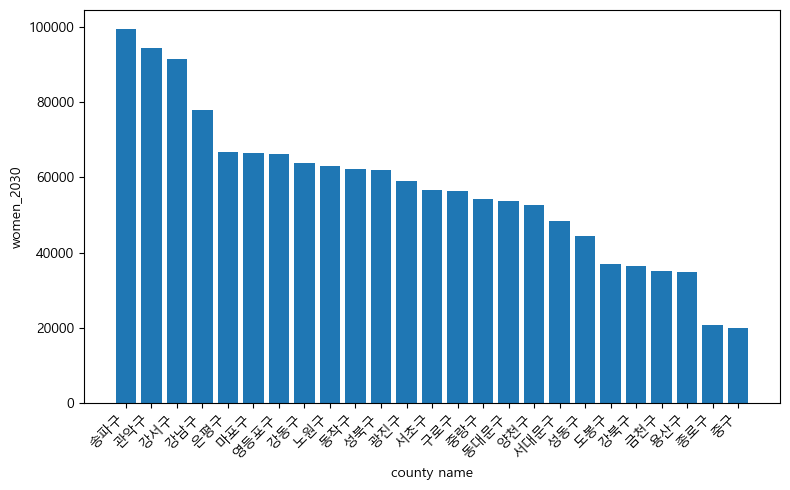

In [36]:
plt.figure(figsize=(8, 5))
plt.bar(sorted_df['county_name'], sorted_df['women_2030'])
plt.xlabel('county name')
plt.ylabel('women_2030')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

<Axes: ylabel='women_2030'>

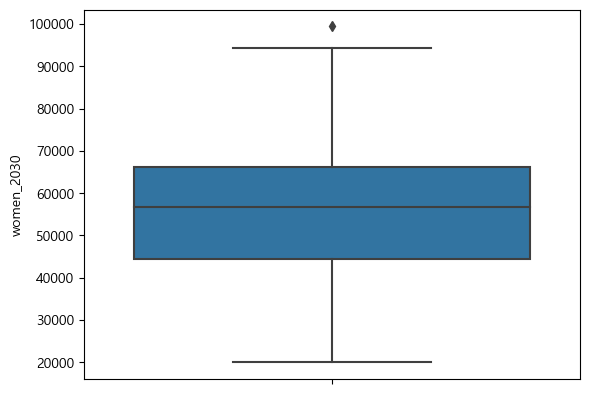

In [38]:
sns.boxplot(data=sorted_df, y='women_2030')

In [ ]:
county_counts = art[art['data_type'] == '박물관'].groupby('county_name').size().reset_index(name='museum_count')

## 일반 범죄 + 성범죄 인구 별 비율 순위

In [3]:
df = pd.read_csv("./data/safety/county_gdp.csv", encoding ='utf-8')
df.head()

,city,county_name,지역내총생산(백만원),구성비(%),1인당 지역내총생산(천원)
0,서울시,종로구,35719537,7.6,238599
1,서울시,중구,61342710,13.0,481395
2,서울시,용산구,13294640,2.8,58918
3,서울시,성동구,13999893,3.0,48682
4,서울시,광진구,6554954,1.4,18732


In [4]:
df_unsafe = df[(df["county_name"] == "강남구") | (df["county_name"] == "영등포구") | (df["county_name"] == "서초구")]
df_safe = df[(df["county_name"] == "도봉구") | (df["county_name"] == "성북구") | (df["county_name"] == "성동구")]

In [68]:
#dff = df.sort_values(by='sex_crime_women_pop23_ratio', ascending=False)
df_unsafe = df_unsafe.sort_values(by='1인당 지역내총생산(천원)', ascending=False)
df_safe = df_safe.sort_values(by='1인당 지역내총생산(천원)', ascending=False)

In [75]:
df_unsafe[["1인당 지역내총생산(천원)"]].mean()

1인당 지역내총생산(천원)    120413.666667
dtype: float64

In [76]:
df_safe[["1인당 지역내총생산(천원)"]].mean()

1인당 지역내총생산(천원)    24841.0
dtype: float64

In [77]:
print(120413.666667 -  24841.0)

95572.666667


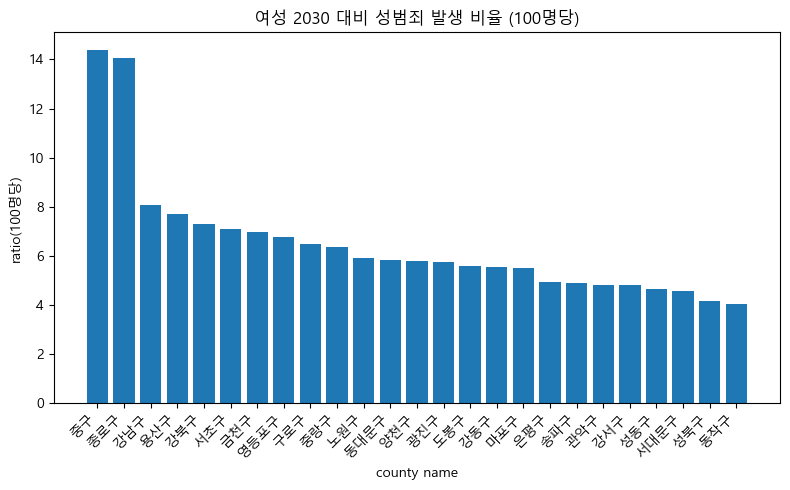

In [367]:
plt.figure(figsize=(8, 5))
plt.bar(df_safe['county_name'], df_safe['sex_crime_women_pop23_ratio'])
plt.title('safe - 1인당 지역내총생산(천원)')
plt.xlabel('county name')
plt.ylabel('ratio(100명당)')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

## 유흥주점

## 자치구 별 전체 인구 대비 유흥주점 순위

In [41]:
pub = pd.read_csv("./data/safety/club_pub_county.csv")
h1 = pd.read_csv("./data/safety/one_house.csv")
h1_ratio = pd.read_csv("./data/safety/county_pop_h1_ratio.csv")
gdp = pd.read_csv("./data/safety/county_gdp.csv")
pop = pd.read_csv("./data/safety/county_pop_2030.csv")

In [78]:
pub.drop(columns=["2030_women","total"], inplace=True)

KeyError: "['2030_women', 'total'] not found in axis"

In [75]:
pub["club_2030women_ratio(만 명당)"] = (pub["club_cnt"] /  pub["2030_women"]) * 10000

In [5]:
one = pd.read_csv("./data/safety/one_house.csv")
one.head()

,county_name,2030_women,h1_women_2030,23w_h1_23women_ratio(10명당),h1_2030,23_h1_23women_ratio(10명당),h1_total
0,강남구,77955,20051,2.572125,36502,4.682445,73579
1,강동구,63912,12794,2.001815,24157,3.779728,59752
2,강북구,36353,8691,2.390724,16815,4.625478,51134
3,강서구,91474,27507,3.007084,50790,5.552397,100695
4,관악구,94240,45370,4.814304,96439,10.233340,145433


In [232]:
pop_w.to_csv("./data/safety/county_pop_h1_ratio.csv", index=False)

In [229]:
pub["club_2030w_h1_ratio(100가구 당)"] = (h1["h1_womem_2030"] / h1["women"] ) * 10
h1

,county_name,h1_total,h1_2030,h1_womem_2030,2030_h1_pop_ratio(100명당),2030_h1_2030_women_ratio(100명당),women,2030_w_h1_women_ratio,23w_h1_23women_ratio(10명당)
0,강남구,73579,36502,20051,6.646951,46.824450,77955,0.257212,2.572125
1,강동구,59752,24157,12794,5.258506,37.797284,63912,0.200181,2.001815
2,강북구,51134,16815,8691,5.848899,46.254780,36353,0.239072,2.390724
3,강서구,100695,50790,27507,9.028531,55.523974,91474,0.300708,3.007084
4,관악구,145433,96439,45370,20.013406,102.333404,94240,0.481430,4.814304
5,광진구,69391,39617,20660,11.814156,67.252326,58908,0.350716,3.507164
6,구로구,58977,26090,12802,6.650336,46.363265,56273,0.227498,2.274981
7,금천구,50528,24592,11306,10.811714,69.965006,35149,0.321659,3.216592
8,노원구,63022,20316,9664,4.085778,32.316869,62865,0.153726,1.537262
9,도봉구,39744,11076,5688,3.611088,29.920579,37018,0.153655,1.536550


#### 유흥주점 개수로 순위 뽑기

In [84]:
pub.head()

,Unnamed: 0,county_name,club_cnt,club_2030women_ratio(만 명당),club_2030w_h1_ratio(100가구 당)
0,0,강남구,350,44.897697,1.745549
1,1,강동구,176,27.537865,1.375645
2,2,강북구,146,40.161747,1.679899
3,3,강서구,282,30.828432,1.025194
4,4,관악구,244,25.891341,0.537800


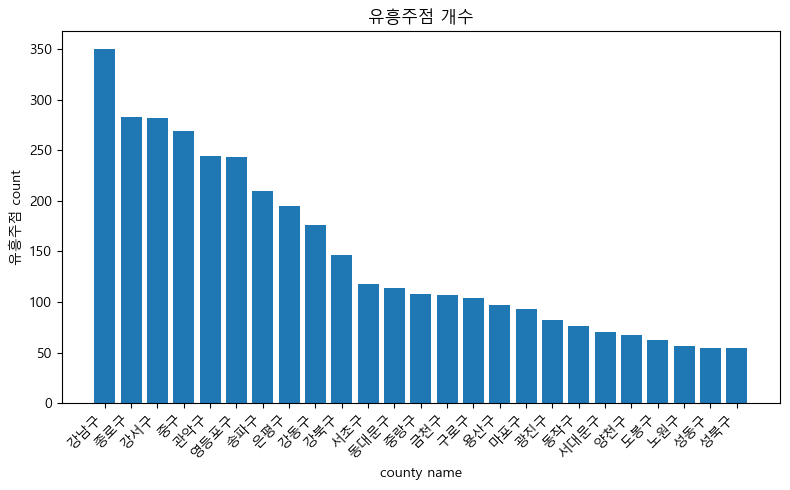

In [521]:
cnt_pub = pub.sort_values(by='club_cnt', ascending=False)
#fig = plt.figure(figsize=(8,5), facecolor='pink')
fig = plt.figure(figsize=(8,5))
plt.bar(cnt_pub['county_name'], cnt_pub['club_cnt'],)
plt.title('유흥주점 개수')
plt.xlabel('county name')
plt.ylabel('유흥주점 count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

<Axes: ylabel='club_cnt'>

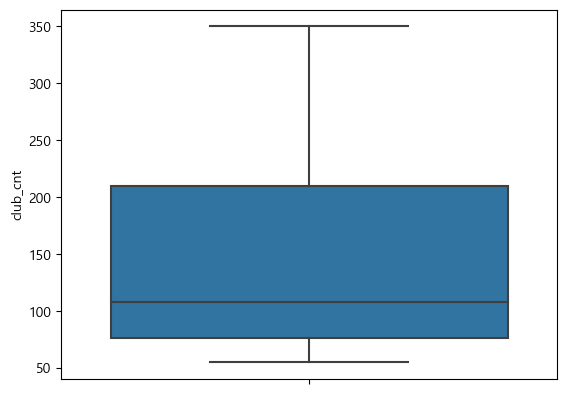

In [381]:
sns.boxplot(data=pub, y='club_cnt')

#### 유흥주점 X 인구, 면적 비율

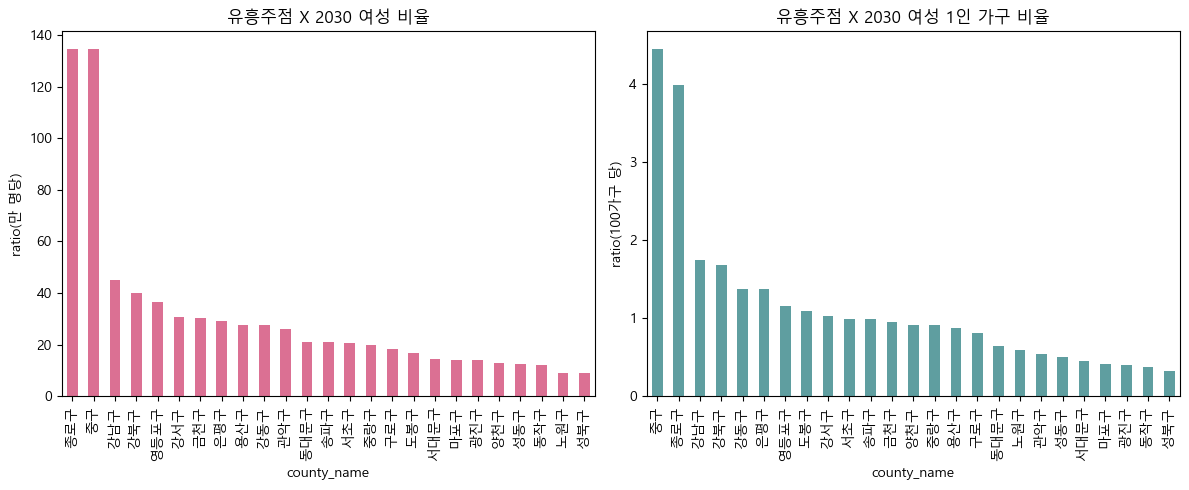

In [42]:
pub_pop = pub.sort_values(by='club_2030women_ratio(만 명당)', ascending=False)
pub_h1 = pub.sort_values(by='club_2030w_h1_ratio(100가구 당)', ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5),)

pub_pop.plot(kind='bar', x='county_name', y='club_2030women_ratio(만 명당)', ax=axes[0], legend=False, color='palevioletred')
axes[0].set_title('유흥주점 X 2030 여성 비율')
axes[0].set_ylabel('ratio(만 명당)')

pub_h1.plot(kind='bar', x='county_name', y='club_2030w_h1_ratio(100가구 당)', ax=axes[1], legend=False, color='cadetblue')
axes[1].set_title('유흥주점 X 2030 여성 1인 가구 비율')
axes[1].set_ylabel('ratio(100가구 당)')

#axes.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: ylabel='club_2030women_ratio(만 명당)'>

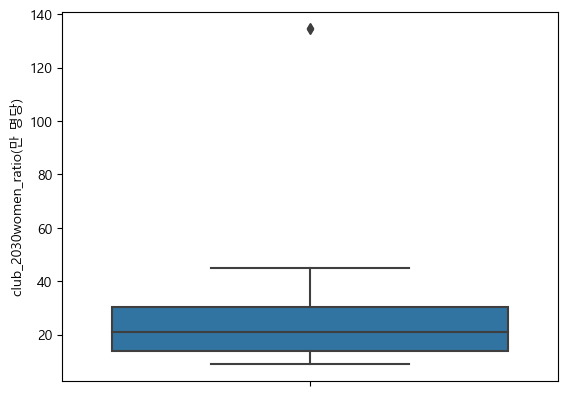

In [43]:
sns.boxplot(data=pub, y='club_2030women_ratio(만 명당)')

#### Unsafe 동네 X 유흥주점 (2030여성인구)

In [86]:
unsafe = pub_pop[(pub_pop["county_name"] == "강남구") | (pub_pop["county_name"] == "서초구") | (pub_pop["county_name"] == "영등포구")]
unsafe

,Unnamed: 0,county_name,club_cnt,club_2030women_ratio(만 명당),club_2030w_h1_ratio(100가구 당)
0,0,강남구,350,44.897697,1.745549
19,19,영등포구,243,36.656560,1.150841
14,14,서초구,118,20.824509,0.987696


#### Safe 동네 X 유흥주점 (2030여성인구)

In [87]:
safe = pub_pop[(pub_pop["county_name"] == "도봉구") | (pub_pop["county_name"] == "성동구") | (pub_pop["county_name"] == "성북구")]
safe

,Unnamed: 0,county_name,club_cnt,club_2030women_ratio(만 명당),club_2030w_h1_ratio(100가구 당)
9,9,도봉구,62,16.748609,1.090014
15,15,성동구,55,12.393528,0.499864
16,16,성북구,55,8.868536,0.320214


#### (not safe vs safe) 유흥주점 X 2030 여성 인구 비율

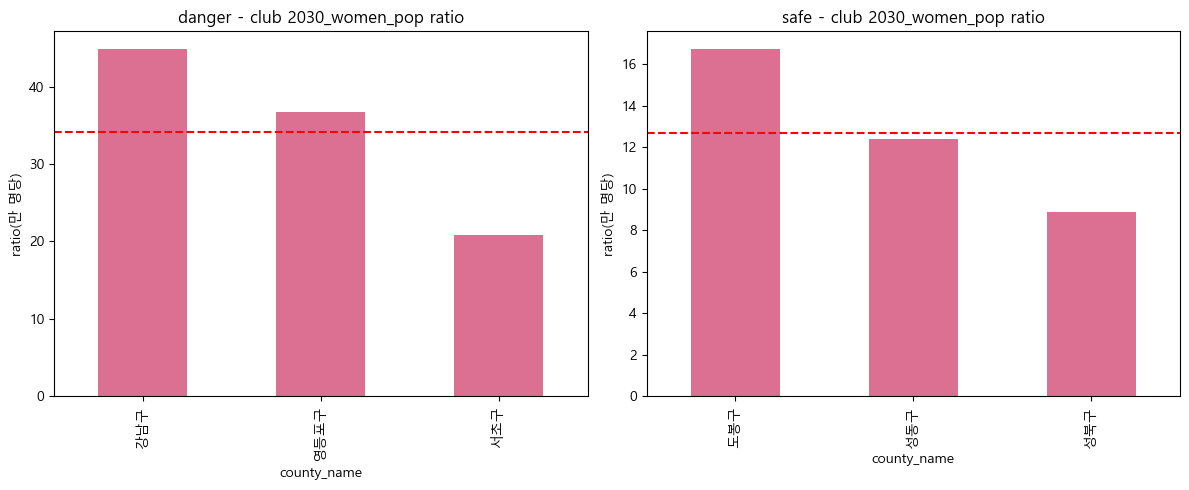

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

unsafe.plot(kind='bar', x='county_name', y='club_2030women_ratio(만 명당)', ax=axes[0], legend=False, color='palevioletred')
axes[0].set_title('danger - club 2030_women_pop ratio')
axes[0].set_ylabel('ratio(만 명당)')

mean_value = unsafe['club_2030women_ratio(만 명당)'].mean()
axes[0].axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')

safe.plot(kind='bar', x='county_name', y='club_2030women_ratio(만 명당)', ax=axes[1], legend=False, color='palevioletred')
axes[1].set_title('safe - club 2030_women_pop ratio')
axes[1].set_ylabel('ratio(만 명당)')

mean_value = safe['club_2030women_ratio(만 명당)'].mean()
axes[1].axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')

plt.tight_layout()
plt.show()

In [97]:
unsafe['club_2030women_ratio(만 명당)'].mean()

34.126255497395015

<Axes: ylabel='club_2030women_ratio(만 명당)'>

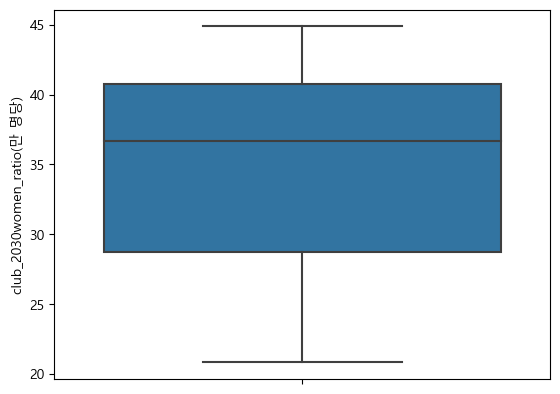

In [432]:
sns.boxplot(data=unsafe, y='club_2030women_ratio(만 명당)')

#### (not safe vs safe) 유흥주점 X 2030 여성 1인 가구 비율

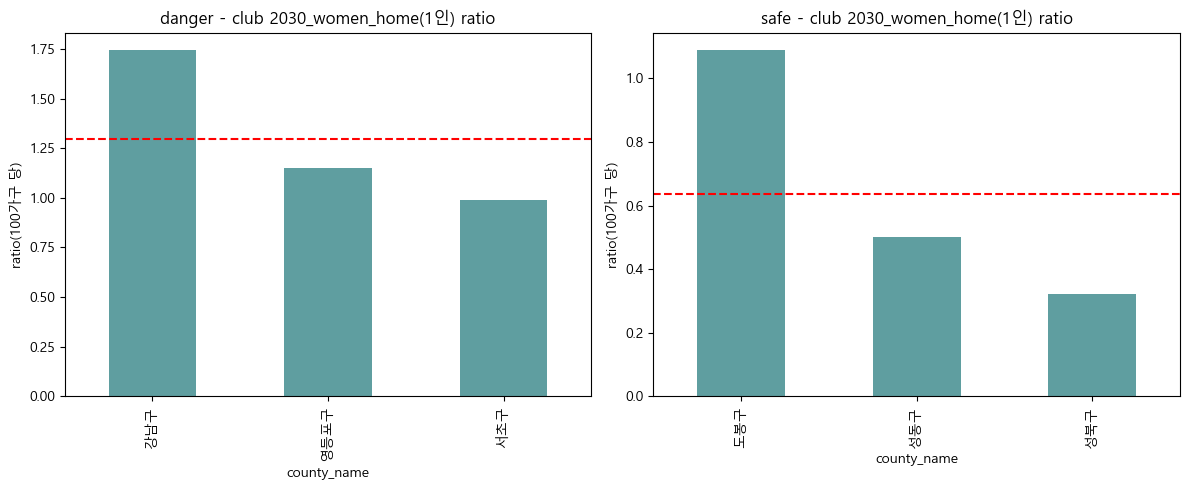

In [100]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

unsafe.plot(kind='bar', x='county_name', y='club_2030w_h1_ratio(100가구 당)', ax=axes[0], legend=False, color='cadetblue')
axes[0].set_title('danger - club 2030_women_home(1인) ratio')
axes[0].set_ylabel('ratio(100가구 당)')

mean_value = unsafe['club_2030w_h1_ratio(100가구 당)'].mean()
axes[0].axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')

safe.plot(kind='bar', x='county_name', y='club_2030w_h1_ratio(100가구 당)', ax=axes[1], legend=False, color='cadetblue')
axes[1].set_title('safe - club 2030_women_home(1인) ratio')
axes[1].set_ylabel('ratio(100가구 당)')

mean_value = safe['club_2030w_h1_ratio(100가구 당)'].mean()
axes[1].axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')

plt.tight_layout()
plt.show()

### 유흥주점 ttest 진행

#### danger & safe 합치기

In [279]:
unsafe_t = unsafe[["county_name", "club_2030women_ratio(만 명당)", "club_2030w_h1_ratio(100가구 당)"]]
#unsafe_t.set_index('county_name', drop=True, inplace=True)
unsafe_t["level"] = "danger"
unsafe_t

C:\Users\82108\AppData\Local\Temp\ipykernel_2368\1752202497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unsafe_t["level"] = "danger"


,county_name,club_2030women_ratio(만 명당),club_2030w_h1_ratio(100가구 당),level
0,강남구,44.897697,1.745549,danger
19,영등포구,36.656560,1.150841,danger
14,서초구,20.824509,0.987696,danger


In [280]:
safe_t = safe[["county_name", "club_2030women_ratio(만 명당)", "club_2030w_h1_ratio(100가구 당)"]]
#safe_t.set_index('county_name', drop=True, inplace=True)
safe_t["level"] = "safe"
safe_t

C:\Users\82108\AppData\Local\Temp\ipykernel_2368\221484946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  safe_t["level"] = "safe"


,county_name,club_2030women_ratio(만 명당),club_2030w_h1_ratio(100가구 당),level
9,도봉구,16.748609,1.090014,safe
15,성동구,12.393528,0.499864,safe
16,성북구,8.868536,0.320214,safe


In [281]:
ttest = pd.concat([safe_t, unsafe_t], axis=0)
#ttest.reset_index(drop=True, inplace=True)
#ttest.set_index('county_name', drop=True, inplace=True)

In [282]:
ttest

,county_name,club_2030women_ratio(만 명당),club_2030w_h1_ratio(100가구 당),level
9,도봉구,16.748609,1.090014,safe
15,성동구,12.393528,0.499864,safe
16,성북구,8.868536,0.320214,safe
0,강남구,44.897697,1.745549,danger
19,영등포구,36.656560,1.150841,danger
14,서초구,20.824509,0.987696,danger


In [285]:
ttest.groupby("level")[["club_2030women_ratio(만 명당)", "club_2030w_h1_ratio(100가구 당)"]].mean()

,club_2030women_ratio(만 명당),club_2030w_h1_ratio(100가구 당)
level,,
danger,34.126255,1.294695
safe,12.670224,0.636697


#### H0 : danger 지역 평균과 safe 지역 평균에 차이가 없다.
#### H1 : danger 지역 평균과 safe 지역 평균에 차이가 있다.

In [152]:
# 등분산 true 이분산 false

In [286]:
from scipy import stats

test_names = ["club_2030women_ratio(만 명당)", "club_2030w_h1_ratio(100가구 당)"]

danger = ttest[ttest['level'] == 'danger'][["club_2030women_ratio(만 명당)", "club_2030w_h1_ratio(100가구 당)"]]
safe = ttest[ttest['level'] == 'safe'][["club_2030women_ratio(만 명당)", "club_2030w_h1_ratio(100가구 당)"]]

for test_name in test_names:
    _, p_value_levene = stats.levene(danger[test_name], safe[test_name])
    if p_value_levene > 0.05:
        print(f"{test_name} p-value: {p_value_levene}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value_levene}, 이분산 가정 만족")

club_2030women_ratio(만 명당) p-value: 0.3203854353159608, 등분산 가정 만족
club_2030w_h1_ratio(100가구 당) p-value: 0.9880038149179586, 등분산 가정 만족


In [287]:
# 양측검정
t_statistic, p_value = stats.ttest_ind(
    a=safe,
    b=danger,
    alternative="two-sided",    # a < b
    equal_var= True,
)
print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")


p-value: [0.04452578 0.11471656]
귀무 가설 기각: [ True False]


In [288]:
# 단측검정
t_statistic, p_value = stats.ttest_ind(
    a=safe,
    b=danger,
    alternative="less",    # a < b
    equal_var= True,
)
print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")


p-value: [0.02226289 0.05735828]
귀무 가설 기각: [ True False]


## 인구 (2030 여성) 대비 유흥주점 비율
양측 + 단측 검정 둘 다 귀무가설 기각 (단측이 더 유의미하게 나옴)

-> danger 지역의 평균이 safe 지역의 평균보다 더 높다

-> danger 지역에 유흥주점이 확실히 더 많다.(인구 대비)

## 1인 가구 (2030여성) 대비 유흥주점 비율
양측 + 단측 검정 둘 다 귀무가설 채택 

-> danger 지역의 평균과 safe 지역의 평균에는 차이가 없다

-> danger 지역이라고 해서 1인 가구(2030여성) 대비 유흥주점이 더 많은 것은 아니다.

## 유흥주점 많은 곳 범죄 종류

유흥주점 X 2030 여성 비율 높은 지역 top5

종로구 - 중구 - 강남구 - 강북구 - 영등포구

In [6]:
crime = pd.read_csv("./data/safety/county_crime_ratio.csv")
house1 = pd.read_csv("./data/safety/one_house.csv")
pop = pd.read_csv("./data/safety/county_pop_h1_ratio.csv")

In [8]:
crime_club = crime.groupby('county_name').agg({
    'total_crime': 'mean',
    'murder_crime' : 'mean',
    'sex_crime' : 'mean',
    'violence_crime' : 'mean',
    'pop_total': 'sum',
    'women_2030': 'sum', 
    'cctv_num': 'sum',
    'light_num': 'sum',
    'house_num': 'sum',
    'police_num': 'sum',
                      })

KeyError: "Column(s) ['cctv_num', 'house_num', 'light_num', 'police_num'] do not exist"

In [24]:
crime['2030_w'] = pop['2030_women']

In [28]:
crime.drop(columns=['sex_crime_23w_ratio'], inplace=True)
crime.head()

,county_name,total_crime,murder_crime,sex_crime,violence_crime,h1_w_2030,pop_total,sex_crime_23w_1house_ratio,theft_robbery,2030_w
0,강남구,6947.0,12.0,667.0,3762.0,20051,78943,0.033265,2506.0,77955
1,강동구,3711.0,5.0,157.0,1872.0,12794,11081,0.012271,1677.0,63912
2,강북구,2832.0,5.0,177.0,1773.0,8691,76600,0.020366,877.0,36353
3,강서구,4663.0,3.0,261.0,2401.0,27507,33965,0.009488,1998.0,91474
4,관악구,4879.0,10.0,327.0,2567.0,45370,92572,0.007207,1975.0,94240


In [29]:
crime["sex_crime_23w_ratio"] = crime["murder_crime"] / crime["2030_w"]
crime["murder_crime_23w_ratio"] = crime["murder_crime"] / crime["2030_w"]
crime["violence_crime_23w_ratio"] = crime["violence_crime"] / crime["2030_w"]
crime["theft_robbery_23w_ratio"] = crime["theft_robbery"] / crime["2030_w"]
crime["murder_crime_23w_1house_ratio"] = crime["murder_crime"] / crime["h1_w_2030"]
crime["violence_crime_23w_1house_ratio"] = crime["violence_crime"] / crime["h1_w_2030"]
crime["theft_robbery_23w_1house_ratio"] = crime["theft_robbery"] / crime["h1_w_2030"]

In [30]:
crime_club = crime[(crime["county_name"] == "강남구") | (crime["county_name"] == "강북구") | (crime["county_name"] == "영등포구") ]
crime_club

,county_name,total_crime,murder_crime,sex_crime,violence_crime,h1_w_2030,pop_total,sex_crime_23w_1house_ratio,theft_robbery,2030_w,sex_crime_23w_ratio,murder_crime_23w_ratio,violence_crime_23w_ratio,theft_robbery_23w_ratio,murder_crime_23w_1house_ratio,violence_crime_23w_1house_ratio,theft_robbery_23w_1house_ratio
0,강남구,6947.0,12.0,667.0,3762.0,20051,78943,0.033265,2506.0,77955,0.000154,0.000154,0.048259,0.032147,0.000598,0.187622,0.124981
2,강북구,2832.0,5.0,177.0,1773.0,8691,76600,0.020366,877.0,36353,0.000138,0.000138,0.048772,0.024125,0.000575,0.204004,0.100909
19,영등포구,4819.0,5.0,327.0,2415.0,21115,3697,0.015487,2072.0,66291,0.000075,0.000075,0.036430,0.031256,0.000237,0.114374,0.098129


In [15]:
crime_club_sd = crime[(crime["county_name"] == "강남구") | (crime["county_name"] == "서초구") | (crime["county_name"] == "영등포구") | (crime["county_name"] == "성북구") | (crime["county_name"] == "성동구") |  (crime["county_name"] == "도봉구")]
crime_club_sd

,county_name,total_crime,murder_crime,sex_crime,violence_crime,h1_w_2030,women_2030,pop_total,sex_crime_23w_ratio,sex_crime_23w_1house_ratio,theft_robbery,murder_crime_23w_ratio,violence_crime_23w_ratio,theft_robbery_23w_ratio,murder_crime_23w_1house_ratio,violence_crime_23w_1house_ratio,theft_robbery_23w_1house_ratio
0,강남구,6947.0,12.0,667.0,3762.0,20051,13315,78943,0.050094,0.033265,2506.0,0.000901,0.282538,0.188209,0.000598,0.187622,0.124981
9,도봉구,2141.0,3.0,70.0,1099.0,5688,14985,115486,0.004671,0.012307,969.0,0.000200,0.073340,0.064665,0.000527,0.193214,0.170359
14,서초구,4459.0,3.0,431.0,2101.0,11947,365,2320,1.180822,0.036076,1924.0,0.008219,5.756164,5.271233,0.000251,0.175860,0.161045
15,성동구,2194.0,2.0,125.0,1086.0,11003,677,4198,0.184638,0.011361,981.0,0.002954,1.604136,1.449040,0.000182,0.098700,0.089158
16,성북구,2749.0,3.0,158.0,1444.0,17176,828,5594,0.190821,0.009199,1144.0,0.003623,1.743961,1.381643,0.000175,0.084071,0.066605
19,영등포구,4819.0,5.0,327.0,2415.0,21115,840,3697,0.389286,0.015487,2072.0,0.005952,2.875000,2.466667,0.000237,0.114374,0.098129


### 유흥주점 X 인구 대비 top3, bottom 3 - 범죄 발생 건수 비교 

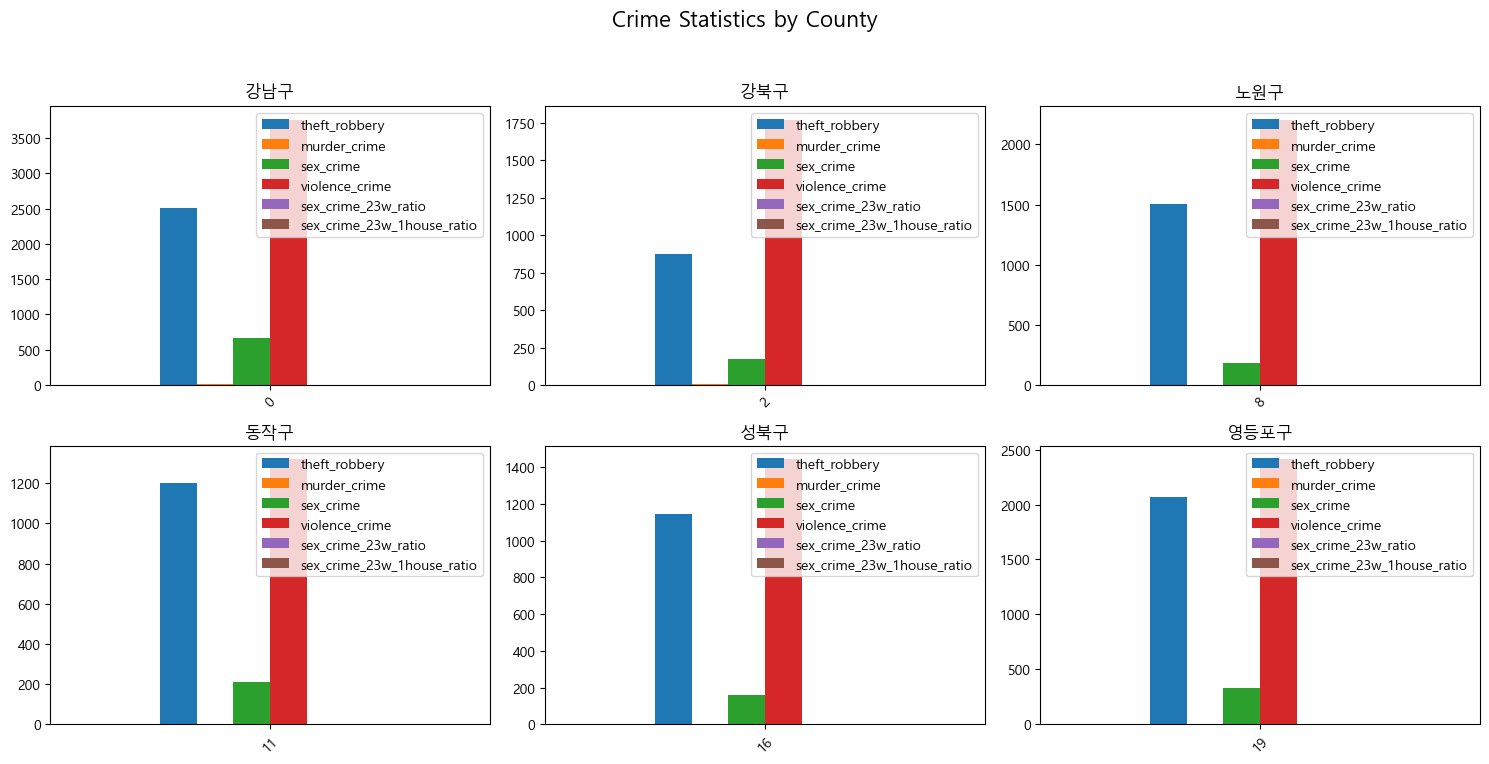

In [19]:
counties = crime_club['county_name'].unique()

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Crime Statistics by County', fontsize=16)


# Using a loop to plot each bar graph
for i, county in enumerate(counties):
    row, col = divmod(i, 3)
    
    # Filtering data for the specific county
    county_data = crime_club[crime_club['county_name'] == county]
    
    # Plotting bar graphs with custom labels
    county_data.drop('county_name', axis=1).plot(kind='bar', ax=axes[row, col], rot=45, title=county)
    
    # Setting legend
    axes[row, col].legend(loc='upper right')

# Adjusting layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

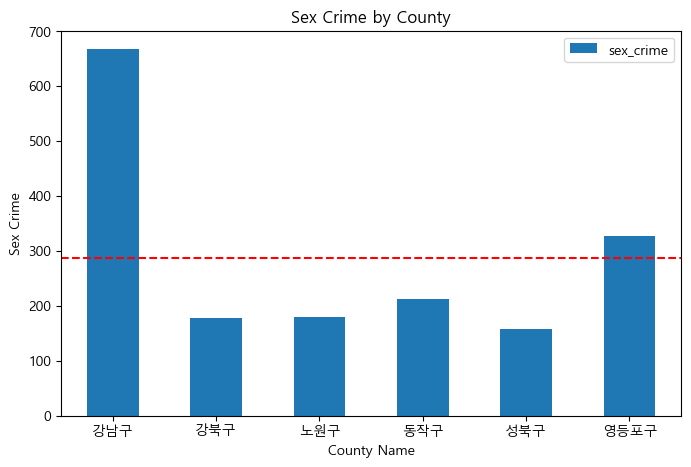

In [20]:
ax = crime_club.plot(kind='bar', x='county_name', y='sex_crime', legend=True, rot=0, figsize=(8, 5))

mean_value = crime_club['sex_crime'].mean()
ax.axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')

# Adding labels and title
plt.xlabel('County Name')
plt.ylabel('Sex Crime')
plt.title('Sex Crime by County')

# Display the plot
plt.show()

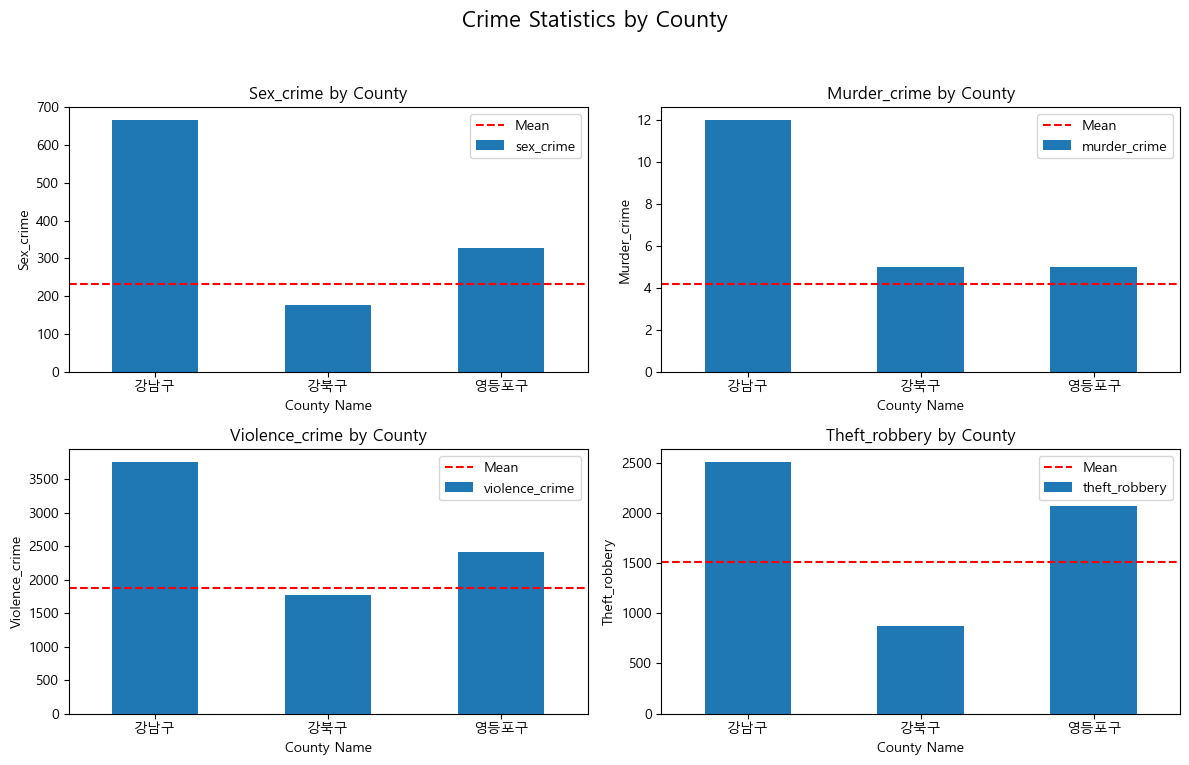

In [16]:
crime_types = ["sex_crime", "murder_crime", "violence_crime", "theft_robbery"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Crime Statistics by County', fontsize=16)

for i, crime_type in enumerate(crime_types):
    row, col = divmod(i, 2)
    
    ax = crime_club.plot(kind='bar', x='county_name', y=crime_type, legend=True, rot=0, ax=axes[row, col])
    
    mean_value = crime[crime_type].mean()
    ax.axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')
    
    ax.set_xlabel('County Name')
    ax.set_ylabel(f'{crime_type.capitalize()}')
    ax.set_title(f'{crime_type.capitalize()} by County')
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 유흥주점 X 인구 대비 top3, bottom 3 - 인구 대비 범죄 발생 건수 비교 

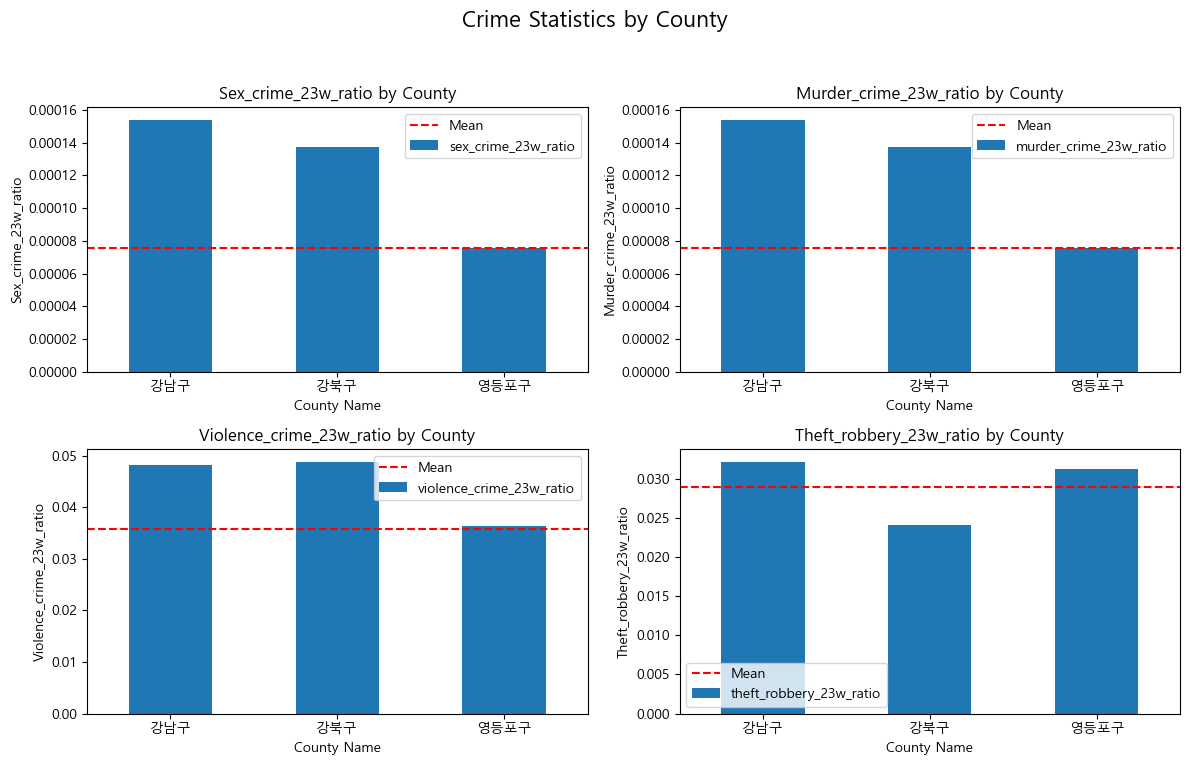

In [31]:
crime_types = ["sex_crime_23w_ratio", "murder_crime_23w_ratio", "violence_crime_23w_ratio", "theft_robbery_23w_ratio"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Crime Statistics by County', fontsize=16)

for i, crime_type in enumerate(crime_types):
    row, col = divmod(i, 2)
    
    ax = crime_club.plot(kind='bar', x='county_name', y=crime_type, legend=True, rot=0, ax=axes[row, col])
    
    mean_value = crime[crime_type].mean()
    ax.axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')
    
    ax.set_xlabel('County Name')
    ax.set_ylabel(f'{crime_type.capitalize()}')
    ax.set_title(f'{crime_type.capitalize()} by County')
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 유흥주점 X 인구 대비 top3, bottom 3 - 1인가구 대비 범죄 발생 건수 비교 

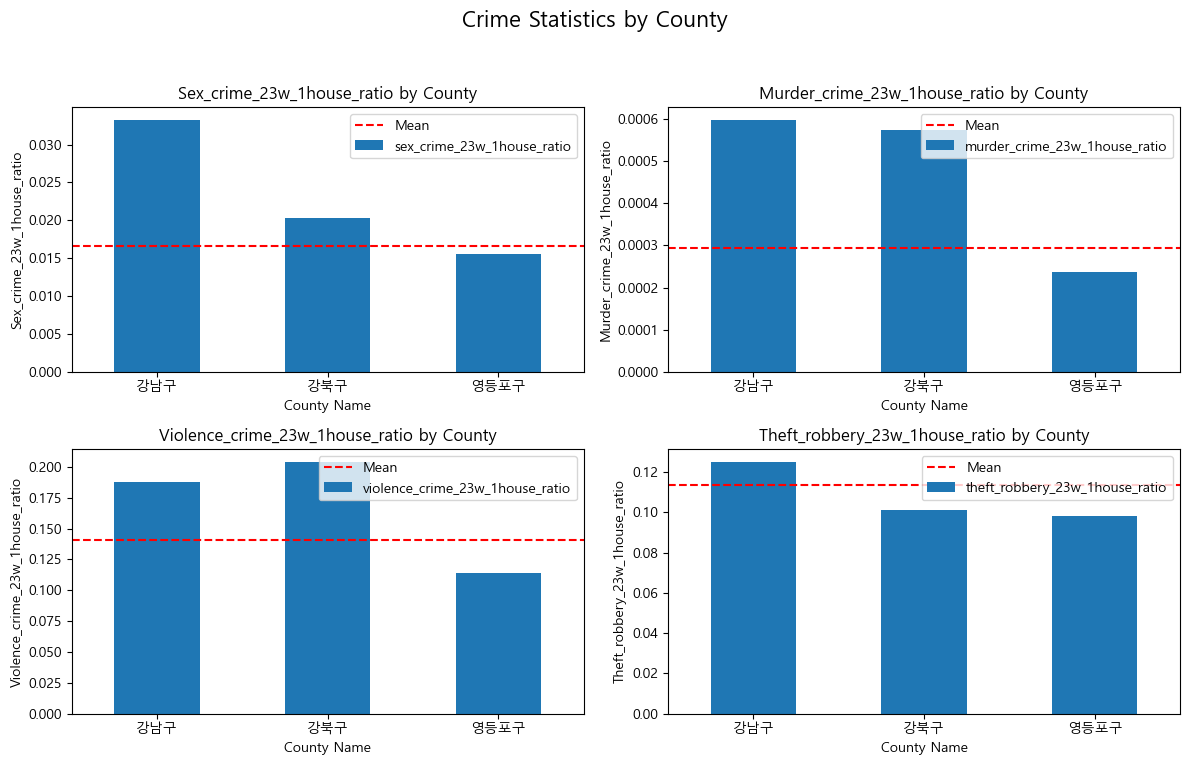

In [20]:
crime_types = ["sex_crime_23w_1house_ratio", "murder_crime_23w_1house_ratio", "violence_crime_23w_1house_ratio", "theft_robbery_23w_1house_ratio"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Crime Statistics by County', fontsize=16)

for i, crime_type in enumerate(crime_types):
    row, col = divmod(i, 2)
    
    ax = crime_club.plot(kind='bar', x='county_name', y=crime_type, legend=True, rot=0, ax=axes[row, col])
    
    mean_value = crime[crime_type].mean()
    ax.axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')
    
    ax.set_xlabel('County Name')
    ax.set_ylabel(f'{crime_type.capitalize()}')
    ax.set_title(f'{crime_type.capitalize()} by County')
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 유흥주점 X 인구 대비 safe, danger - 범죄 발생 건수 비교 

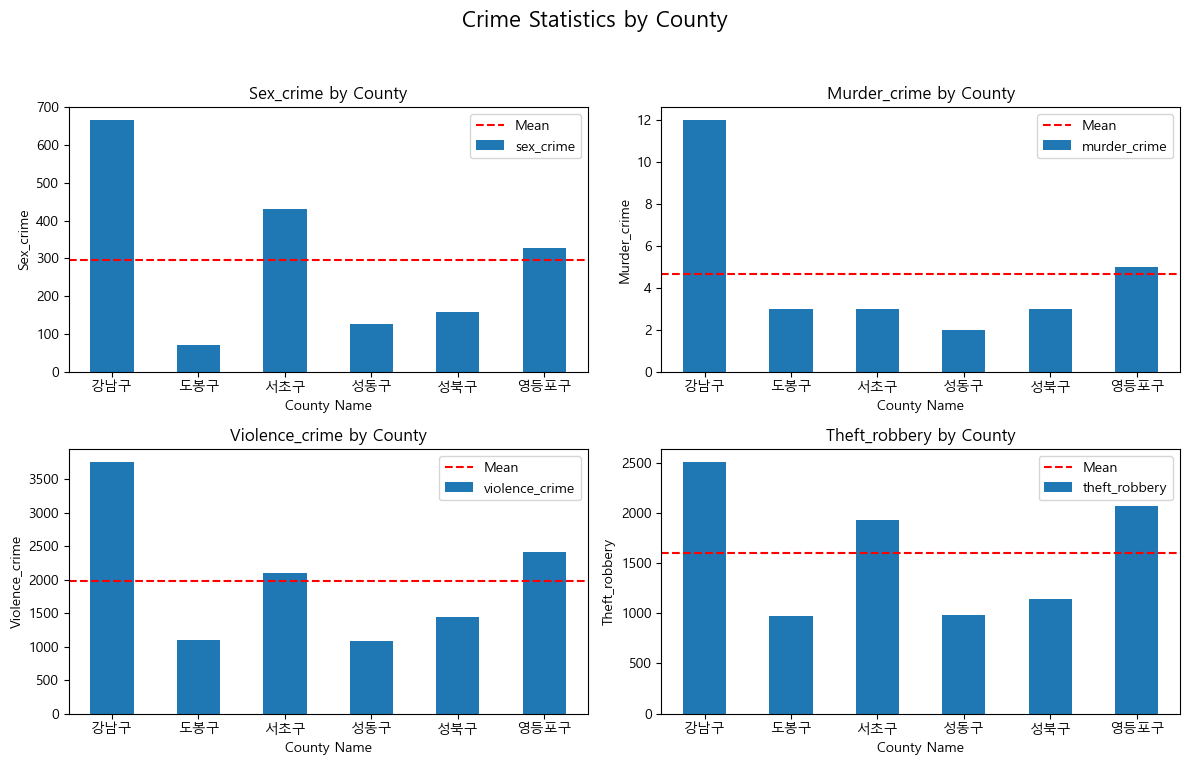

In [108]:
crime_types = ["sex_crime", "murder_crime", "violence_crime", "theft_robbery"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Crime Statistics by County', fontsize=16)

for i, crime_type in enumerate(crime_types):
    row, col = divmod(i, 2)
    
    ax = crime_club_sd.plot(kind='bar', x='county_name', y=crime_type, legend=True, rot=0, ax=axes[row, col])
    
    mean_value = crime_club_sd[crime_type].mean()
    ax.axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')
    
    ax.set_xlabel('County Name')
    ax.set_ylabel(f'{crime_type.capitalize()}')
    ax.set_title(f'{crime_type.capitalize()} by County')
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 유흥주점 X 인구 대비 safe, danger - 인구 대비 범죄 발생 건수 비교 

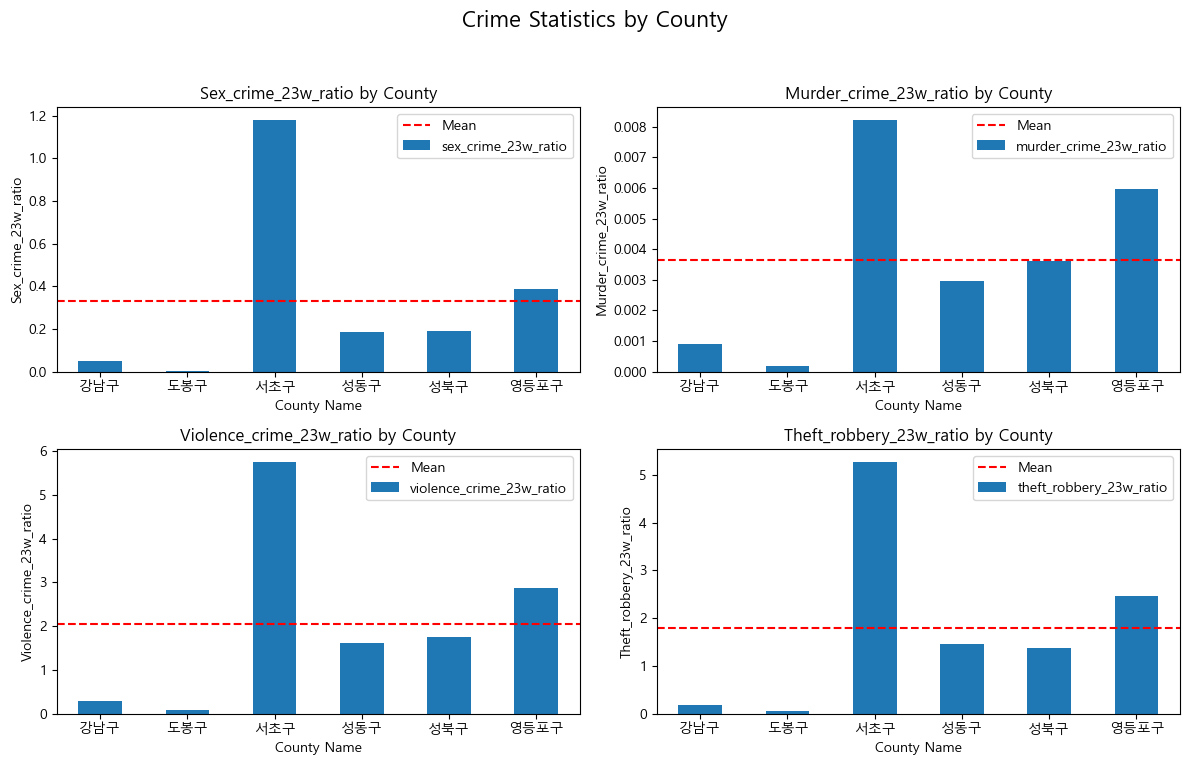

In [45]:
crime_types = ["sex_crime_23w_ratio", "murder_crime_23w_ratio", "violence_crime_23w_ratio", "theft_robbery_23w_ratio"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Crime Statistics by County', fontsize=16)

for i, crime_type in enumerate(crime_types):
    row, col = divmod(i, 2)
    
    ax = crime_club_sd.plot(kind='bar', x='county_name', y=crime_type, legend=True, rot=0, ax=axes[row, col])
    
    mean_value = crime_club_sd[crime_type].mean()
    ax.axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')
    
    ax.set_xlabel('County Name')
    ax.set_ylabel(f'{crime_type.capitalize()}')
    ax.set_title(f'{crime_type.capitalize()} by County')
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 유흥주점 X 인구 대비 safe, danger - 1인 가구 대비 범죄 발생 건수 비교 

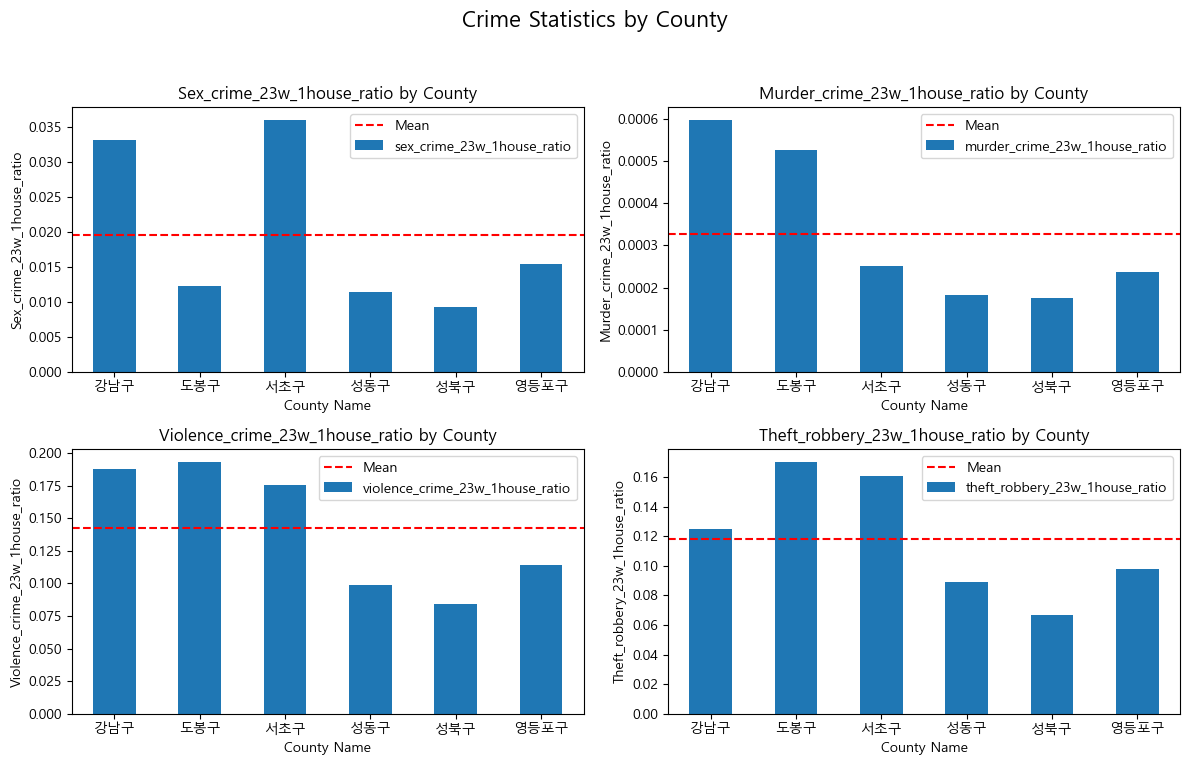

In [47]:
crime_types = ["sex_crime_23w_1house_ratio", "murder_crime_23w_1house_ratio", "violence_crime_23w_1house_ratio", "theft_robbery_23w_1house_ratio"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Crime Statistics by County', fontsize=16)

for i, crime_type in enumerate(crime_types):
    row, col = divmod(i, 2)
    
    ax = crime_club_sd.plot(kind='bar', x='county_name', y=crime_type, legend=True, rot=0, ax=axes[row, col])
    
    mean_value = crime_club_sd[crime_type].mean()
    ax.axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')
    
    ax.set_xlabel('County Name')
    ax.set_ylabel(f'{crime_type.capitalize()}')
    ax.set_title(f'{crime_type.capitalize()} by County')
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 유흥주점 동으로 살펴보기

In [7]:
df= pd.read_csv("./data/safety/club_town.csv")
df.head()

,name,address,id,type,county_name,town_name,city_name,data_type
0,판도라,서울특별시 관악구 신림동 530-31 상진,3200000,단란주점,관악구,신림동,서울,유흥주점
1,왓따7080,서울특별시 은평구 구산동 321-98 지하1층,3110000,단란주점,은평구,구산동,서울,유흥주점
2,서담주점,서울특별시 구로구 구로동 153-3,3160000,단란주점,구로구,구로동,서울,유흥주점
3,유토피아,서울특별시 중랑구 묵동 245-1,3060000,단란주점,중랑구,묵동,서울,유흥주점
4,테크노,서울특별시 서대문구 홍제동 173-2,3120000,단란주점,서대문구,홍제동,서울,유흥주점


In [9]:
df['town_club_cnt'] = df.groupby('town_name')['name'].transform('count')
df[df["town_name"]=="도선동"]

,name,address,id,type,county_name,town_name,city_name,data_type,town_club_cnt
180,테마,서울특별시 성동구 도선동 253-4번지,3030000,단란주점,성동구,도선동,서울,유흥주점,24
547,안동역,서울특별시 성동구 도선동 253-5번지 (지상2층),3030000,단란주점,성동구,도선동,서울,유흥주점,24
548,베스트 노래클럽,서울특별시 성동구 도선동 253-3 지상1층,3030000,단란주점,성동구,도선동,서울,유흥주점,24
559,7080 콘서트,서울특별시 성동구 도선동 402-0번지,3030000,단란주점,성동구,도선동,서울,유흥주점,24
561,로데오노래주점,"서울특별시 성동구 도선동 253-5 ,6,9",3030000,단란주점,성동구,도선동,서울,유흥주점,24
563,앤,"서울특별시 성동구 도선동 148번지 (지상2,3층)",3030000,단란주점,성동구,도선동,서울,유흥주점,24
564,왕코 뮤직타운,서울특별시 성동구 도선동 161번지 지하1층,3030000,단란주점,성동구,도선동,서울,유흥주점,24
565,황금,서울특별시 성동구 도선동 253-1번지 지하1층,3030000,단란주점,성동구,도선동,서울,유흥주점,24
566,엠비씨(MBC)단란주점,서울특별시 성동구 도선동 68번지,3030000,단란주점,성동구,도선동,서울,유흥주점,24
567,와이제이(YJ),서울특별시 성동구 도선동 276번지,3030000,단란주점,성동구,도선동,서울,유흥주점,24


In [14]:
county_df = df[df['county_name'] == '강서구']
town_counts = county_df.groupby('town_name').size().reset_index(name='club_count')

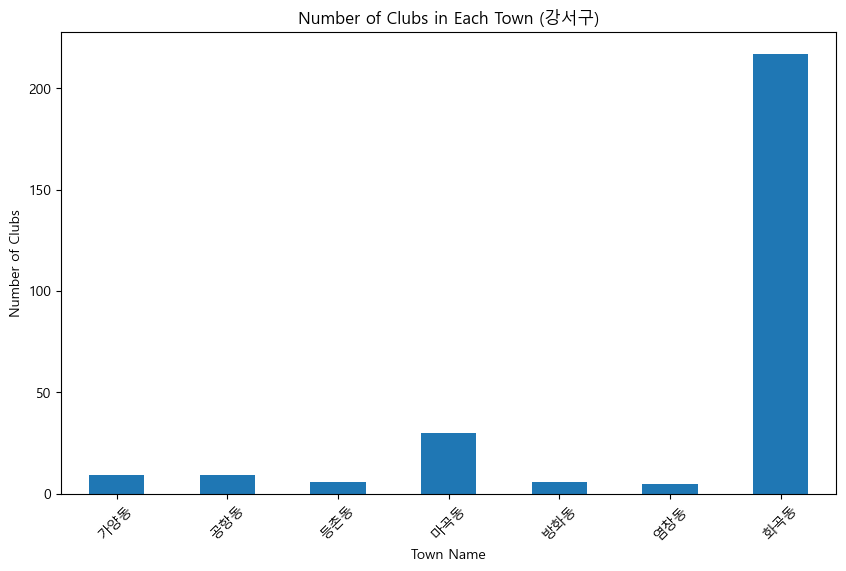

In [15]:
town_counts.plot(kind='bar', x='town_name', y='club_count', legend=False, rot=45, figsize=(10, 6))
plt.xlabel('Town Name')
plt.ylabel('Number of Clubs')
plt.title('Number of Clubs in Each Town (강서구)')

plt.show()

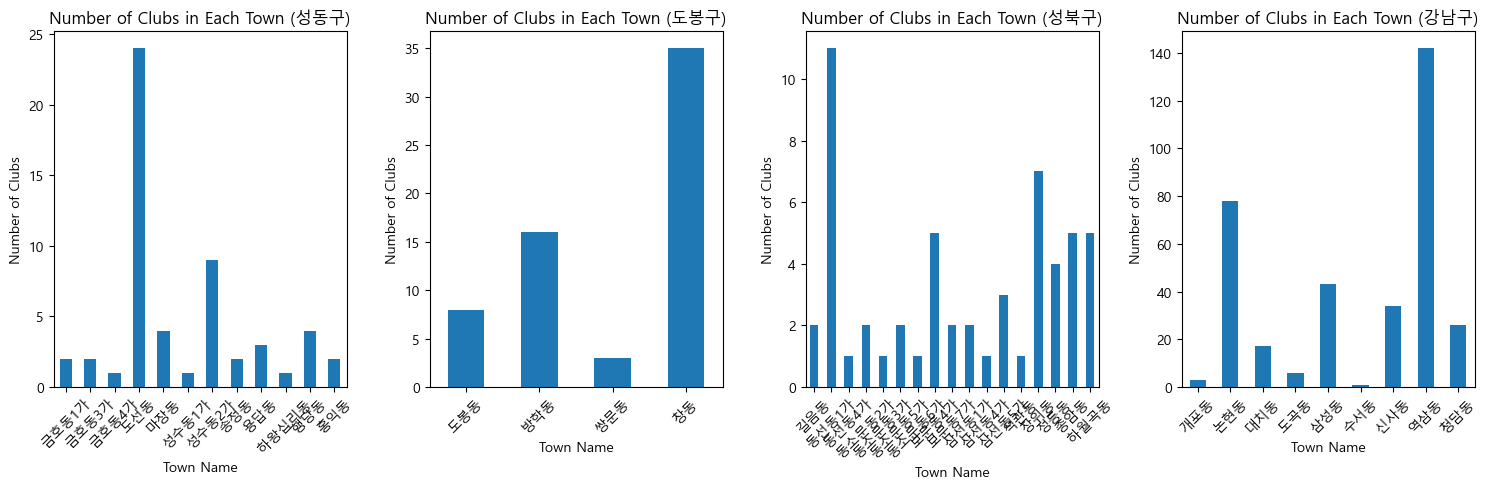

In [16]:
# List of counties
counties = ['성동구', '도봉구', '성북구', '강남구']

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=len(counties), figsize=(15, 5))


# Plotting for each county
for i, county in enumerate(counties):
    # Filter data for the specific county
    county_df = df[df['county_name'] == county]
    town_counts = county_df.groupby('town_name').size().reset_index(name='club_count')
    
    # Plotting bar graph
    town_counts.plot(kind='bar', x='town_name', y='club_count', ax=axes[i], legend=False, rot=45)
    
    # Adding labels and title
    axes[i].set_xlabel('Town Name')
    axes[i].set_ylabel('Number of Clubs')
    axes[i].set_title(f'Number of Clubs in Each Town ({county})')

# Adjusting layout
plt.tight_layout()
plt.show()

In [54]:
dff = pd.read_csv("./data/safety/club_town.csv")
pop_t = pd.read_csv("./data/safety/pop_by_dong.csv")

In [ ]:
crime_club = crime.groupby('county_name').agg({
    'total_crime': 'mean',
    'murder_crime' : 'mean',
    'sex_crime' : 'mean',
    'violence_crime' : 'mean',
    'pop_total': 'sum',
    'women_2030': 'sum', 
    'cctv_num': 'sum',
    'light_num': 'sum',
    'house_num': 'sum',
    'police_num': 'sum',
                      })

In [55]:
pop_t = pop_t[["town_name", "women_2030"]]

In [56]:
merged_df = pd.merge(df, pop_t, on='town_name')
merged_df

,name,address,id,type,county_name,town_name,city_name,data_type,town_club_cnt,women_2030
0,판도라,서울특별시 관악구 신림동 530-31 상진,3200000,단란주점,관악구,신림동,서울,유흥주점,178,44533
1,남강,서울특별시 관악구 신림동 499-50,3200000,단란주점,관악구,신림동,서울,유흥주점,178,44533
2,스위트 데빌스,서울특별시 관악구 신림동 1431-41,3200000,단란주점,관악구,신림동,서울,유흥주점,178,44533
3,모이자,서울특별시 관악구 신림동 527-3,3200000,단란주점,관악구,신림동,서울,유흥주점,178,44533
4,플로우서울(FLOW),서울특별시 관악구 신림동 1640-28,3200000,단란주점,관악구,신림동,서울,유흥주점,178,44533
...,...,...,...,...,...,...,...,...,...,...
3730,블루(Blue),서울특별시 영등포구 당산동5가 33-9번지 지하1층,3180000,룸살롱,영등포구,당산동5가,서울,유흥주점,3,2539
3731,도도,서울특별시 영등포구 당산동5가 33-8 대영빌딩,3180000,룸살롱,영등포구,당산동5가,서울,유흥주점,3,2539
3732,궁전노래바,서울특별시 영등포구 당산동5가 32-1,3180000,룸살롱,영등포구,당산동5가,서울,유흥주점,3,2539
3733,팡팡,서울특별시 영등포구 문래동1가 58-15번지,3180000,룸살롱,영등포구,문래동1가,서울,유흥주점,1,28


In [57]:
merged_df["town_club_pop_ratio(천 명당)"] = (merged_df["town_club_cnt"] / merged_df["women_2030"])* 1000

In [46]:
merged_df

,name,address,id,type,county_name,town_name,city_name,data_type,town_club_cnt,women_2030,town_club_pop_ratio(천 명당)
0,판도라,서울특별시 관악구 신림동 530-31 상진,3200000,단란주점,관악구,신림동,서울,유흥주점,178,44533,3.997036
1,남강,서울특별시 관악구 신림동 499-50,3200000,단란주점,관악구,신림동,서울,유흥주점,178,44533,3.997036
2,스위트 데빌스,서울특별시 관악구 신림동 1431-41,3200000,단란주점,관악구,신림동,서울,유흥주점,178,44533,3.997036
3,모이자,서울특별시 관악구 신림동 527-3,3200000,단란주점,관악구,신림동,서울,유흥주점,178,44533,3.997036
4,플로우서울(FLOW),서울특별시 관악구 신림동 1640-28,3200000,단란주점,관악구,신림동,서울,유흥주점,178,44533,3.997036
...,...,...,...,...,...,...,...,...,...,...,...
3730,블루(Blue),서울특별시 영등포구 당산동5가 33-9번지 지하1층,3180000,룸살롱,영등포구,당산동5가,서울,유흥주점,3,2539,1.181568
3731,도도,서울특별시 영등포구 당산동5가 33-8 대영빌딩,3180000,룸살롱,영등포구,당산동5가,서울,유흥주점,3,2539,1.181568
3732,궁전노래바,서울특별시 영등포구 당산동5가 32-1,3180000,룸살롱,영등포구,당산동5가,서울,유흥주점,3,2539,1.181568
3733,팡팡,서울특별시 영등포구 문래동1가 58-15번지,3180000,룸살롱,영등포구,문래동1가,서울,유흥주점,1,28,35.714286


In [114]:
len(town_c)

274

In [59]:
merged = merged_df[merged_df["county_name"] == "강서구"]
merged = merged.groupby('town_name')

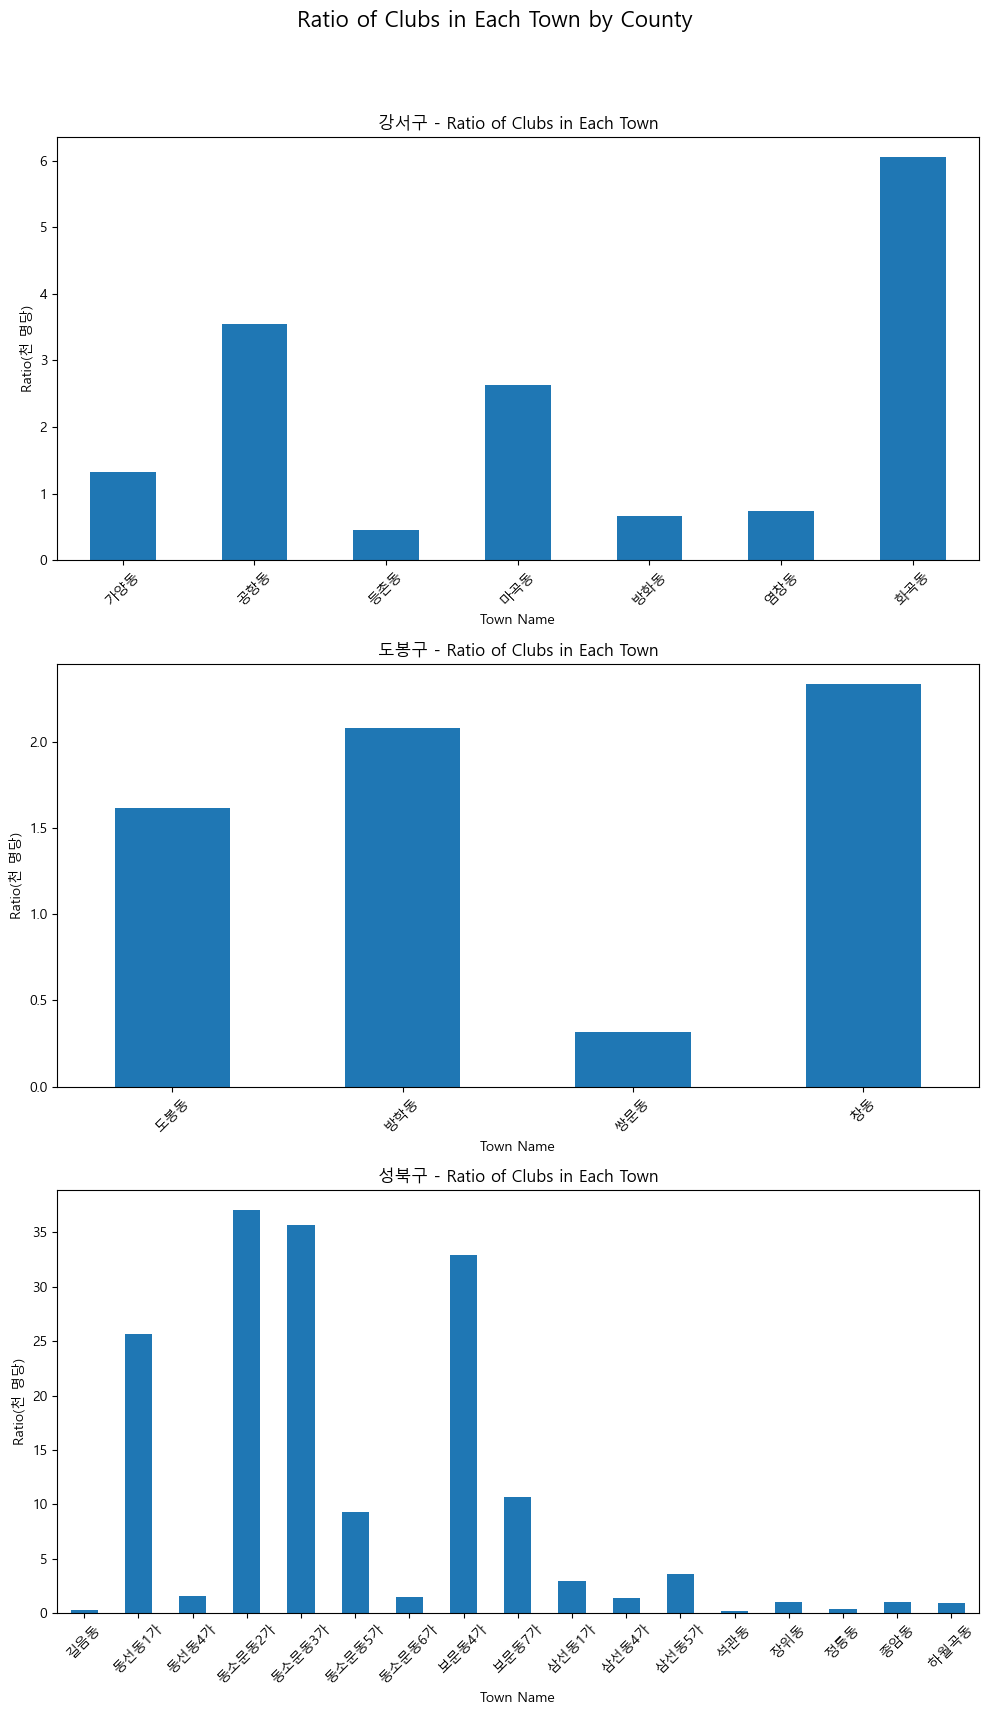

In [49]:
counties = ['강서구', '도봉구', '성북구']

# Create subplots
fig, axes = plt.subplots(nrows=len(counties), ncols=1, figsize=(10, 6 * len(counties)))
fig.suptitle('Ratio of Clubs in Each Town by County', fontsize=16)

# Iterate over counties
for i, county in enumerate(counties):
    # Filter data for the specific county
    county_data = merged_df[merged_df['county_name'] == county]
    
    # Group by 'town_name' and calculate the mean ratio
    town_data = county_data.groupby('town_name')['town_club_pop_ratio(천 명당)'].mean()n')
    
    # Plot the bar graph for each county
    town_data.plot(kind='bar', ax=axes[i], rot=45, title=f'{county} - Ratio of Clubs in Each Town')
    axes[i].set_xlabel('Town Name')
    axes[i].set_ylabel('Ratio(천 명당)')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [27]:
dd = pd.read_csv("./data/safety/concat_data_safe.csv")
dd = dd[dd["county_name"] == "강서구"]
dd["cctv_w2030_ratio(천명 당)"] = (dd["cctv_num"] / dd["women_2030"]) * 1000
dd

,county_name,total_crime,murder_crime,sex_crime,violence_crime,town_name,pop_total,men_2030,women_2030,cctv_num,light_num,house_num,police_num,cctv_w2030_ratio(천명 당)
297,강서구,4663,3,261,2401,염창동,41260,5729,6816,102,415,0,1,14.964789
298,강서구,4663,3,261,2401,등촌동,73652,11829,13333,221,826,4,1,16.575414
299,강서구,4663,3,261,2401,화곡동,217278,34420,35890,1077,4420,24,4,30.008359
300,강서구,4663,3,261,2401,가양동,43133,6003,6786,80,201,1,1,11.788977
301,강서구,4663,3,261,2401,마곡동,53920,7822,11380,307,87,0,1,26.977153
302,강서구,4663,3,261,2401,내발산동,44651,4995,5377,138,444,1,1,25.664869
303,강서구,4663,3,261,2401,외발산동,956,179,102,3,58,0,0,29.411765
304,강서구,4663,3,261,2401,공항동,17227,3063,2537,105,716,2,0,41.387466
305,강서구,4663,3,261,2401,방화동,68811,9525,9112,293,1229,4,2,32.155399
306,강서구,4663,3,261,2401,개화동,1640,193,140,105,239,0,0,750.000000


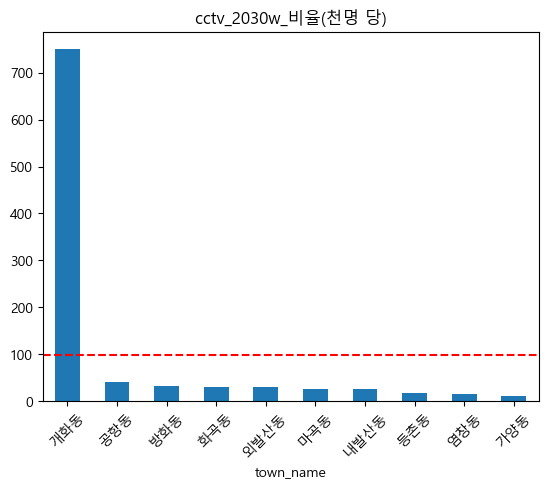

In [11]:
plt.figsize=(10, 5)
county_data = dd[dd["county_name"] == "강서구"]
town_data = county_data.groupby('town_name')['cctv_w2030_ratio(천명 당)'].mean().sort_values(ascending=False)
town_data.plot(kind='bar', rot=45, title='cctv_2030w_비율(천명 당)')
mean_value = dd['cctv_w2030_ratio(천명 당)'].mean()
plt.axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')
plt.savefig('강서구_club.png', format='png')
plt.show()

## 1인 가구수

#### 전체 & 2030 - 1인 가구 순위

In [199]:
h1.head()

,county_name,2030_women,h1_women_2030,23w_h1_23women_ratio(10명당),h1_2030,23_h1_23women_ratio(10명당),h1_total
0,강남구,77955,20051,2.572125,36502,4.682445,73579
1,강동구,63912,12794,2.001815,24157,3.779728,59752
2,강북구,36353,8691,2.390724,16815,4.625478,51134
3,강서구,91474,27507,3.007084,50790,5.552397,100695
4,관악구,94240,45370,4.814304,96439,10.233340,145433


In [200]:
h1_ratio.head()

,county_name,2030_women,h1_women_2030,23w_h1_23women_ratio(10명당)
0,강남구,77955,20051,2.572125
1,강동구,63912,12794,2.001815
2,강북구,36353,8691,2.390724
3,강서구,91474,27507,3.007084
4,관악구,94240,45370,4.814304


In [201]:
h1 = h1_ratio

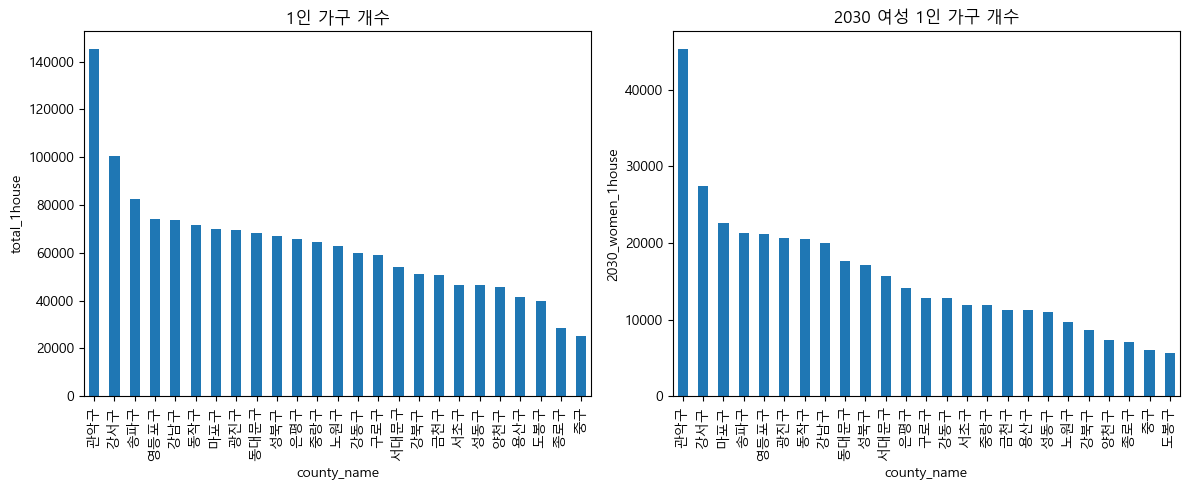

In [102]:
data = h1.sort_values(by='h1_total', ascending=False)
data_01 = h1.sort_values(by='h1_women_2030', ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

data.plot(kind='bar', x='county_name', y='h1_total', ax=axes[0], legend=False, )
axes[0].set_title('1인 가구 개수')
axes[0].set_ylabel('total_1house')

data_01.plot(kind='bar', x='county_name', y='h1_women_2030', ax=axes[1], legend=False, )
axes[1].set_title('2030 여성 1인 가구 개수')
axes[1].set_ylabel('2030_women_1house')


plt.tight_layout()
plt.show()

<Axes: ylabel='h1_women_2030'>

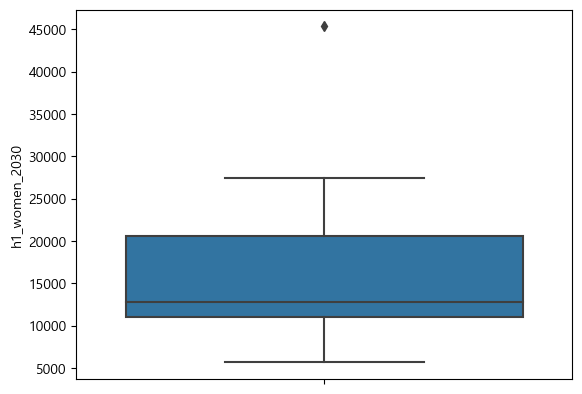

In [444]:
sns.boxplot(data=h1, y='h1_women_2030')

#### 2030 여성 인구 수 대비 2030_1인 가구 & 여성 2030_1인 가구 수 비율 

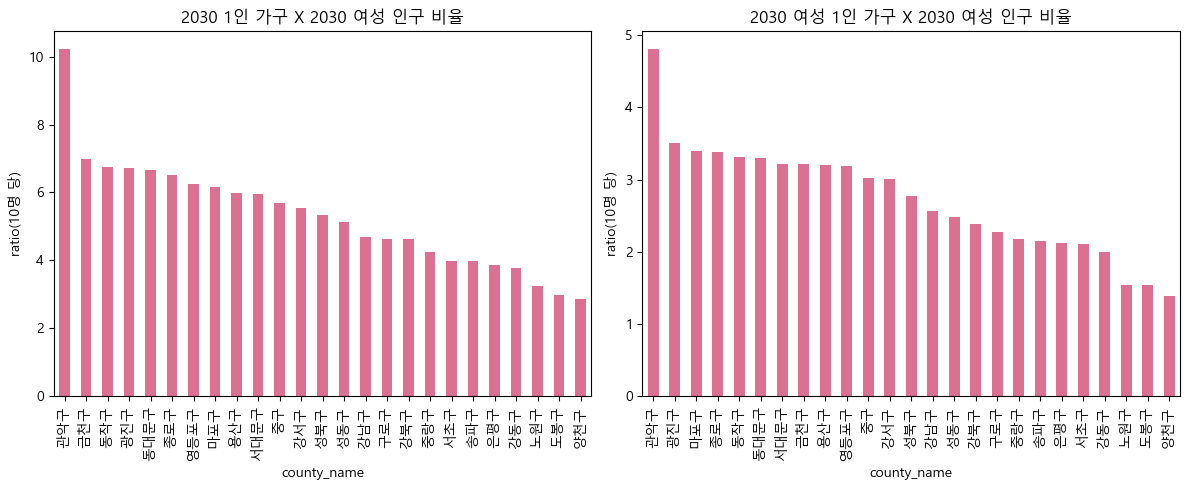

In [446]:
pop = h1.sort_values(by='23_h1_23women_ratio(10명당)', ascending=False)
women = h1.sort_values(by='23w_h1_23women_ratio(10명당)', ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

pop.plot(kind='bar', x='county_name', y='23_h1_23women_ratio(10명당)', ax=axes[0], legend=False, color='palevioletred')
axes[0].set_title('2030 1인 가구 X 2030 여성 인구 비율')
axes[0].set_ylabel('ratio(10명 당)')

women.plot(kind='bar', x='county_name', y='23w_h1_23women_ratio(10명당)', ax=axes[1], legend=False, color='palevioletred')
axes[1].set_title('2030 여성 1인 가구 X 2030 여성 인구 비율')
axes[1].set_ylabel('ratio(10명 당)')

plt.tight_layout()
plt.show()

<Axes: ylabel='23w_h1_23women_ratio(10명당)'>

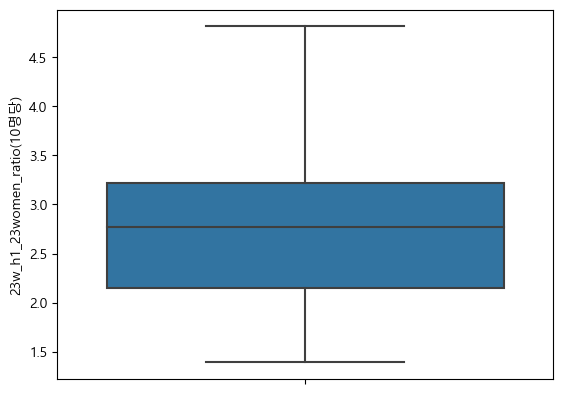

In [449]:
sns.boxplot(data=h1, y='23w_h1_23women_ratio(10명당)')

In [103]:
unsafe = h1[(h1["county_name"] == "강남구") | (h1["county_name"] == "서초구") | (h1["county_name"] == "영등포구")]
unsafe

,county_name,2030_women,h1_women_2030,23w_h1_23women_ratio(10명당),h1_2030,23_h1_23women_ratio(10명당),h1_total
0,강남구,77955,20051,2.572125,36502,4.682445,73579
14,서초구,56664,11947,2.108393,22608,3.989835,46745
19,영등포구,66291,21115,3.185199,41342,6.236442,73962


In [104]:
safe = h1[(h1["county_name"] == "도봉구") | (h1["county_name"] == "성동구") | (h1["county_name"] == "성북구")]
safe

,county_name,2030_women,h1_women_2030,23w_h1_23women_ratio(10명당),h1_2030,23_h1_23women_ratio(10명당),h1_total
9,도봉구,37018,5688,1.536550,11076,2.992058,39744
15,성동구,44378,11003,2.479382,22783,5.133850,46548
16,성북구,62017,17176,2.769563,33133,5.342567,67222


#### (not safe vs safe) 2030 1인 가구 X 2030 여성 인구 비율

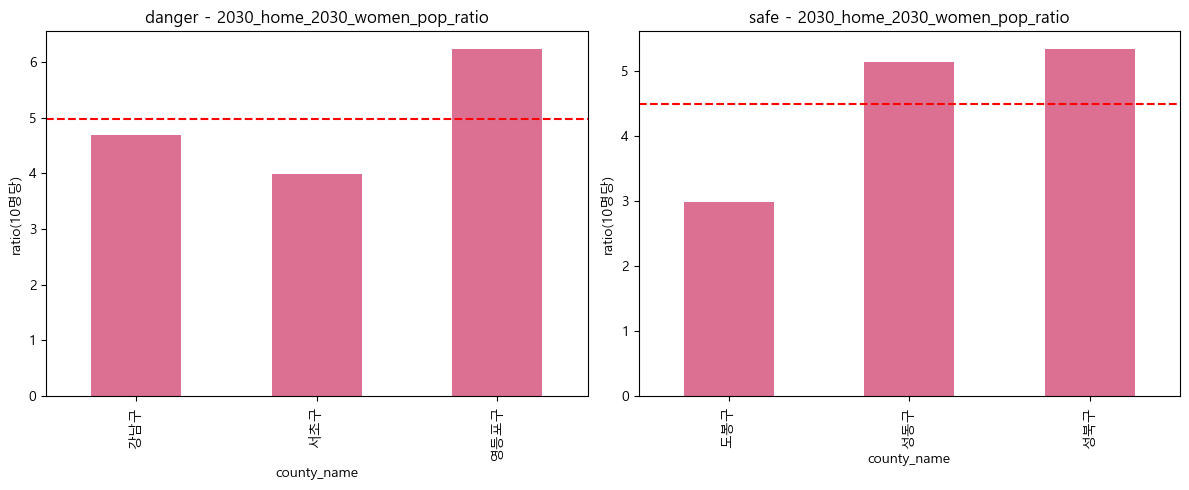

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

unsafe.plot(kind='bar', x='county_name', y='23_h1_23women_ratio(10명당)', ax=axes[0], legend=False, color='palevioletred')
axes[0].set_title('danger - 2030_home_2030_women_pop_ratio')
axes[0].set_ylabel('ratio(10명당)')

mean_value = unsafe['23_h1_23women_ratio(10명당)'].mean()
axes[0].axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')

safe.plot(kind='bar', x='county_name', y='23_h1_23women_ratio(10명당)', ax=axes[1], legend=False, color='palevioletred')
axes[1].set_title('safe - 2030_home_2030_women_pop_ratio')
axes[1].set_ylabel('ratio(10명당)')

mean_value = safe['23_h1_23women_ratio(10명당)'].mean()
axes[1].axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')

plt.tight_layout()
plt.show()

#### (not safe vs safe) 2030 여성 1인 가구 X 2030 여성 인구 비율

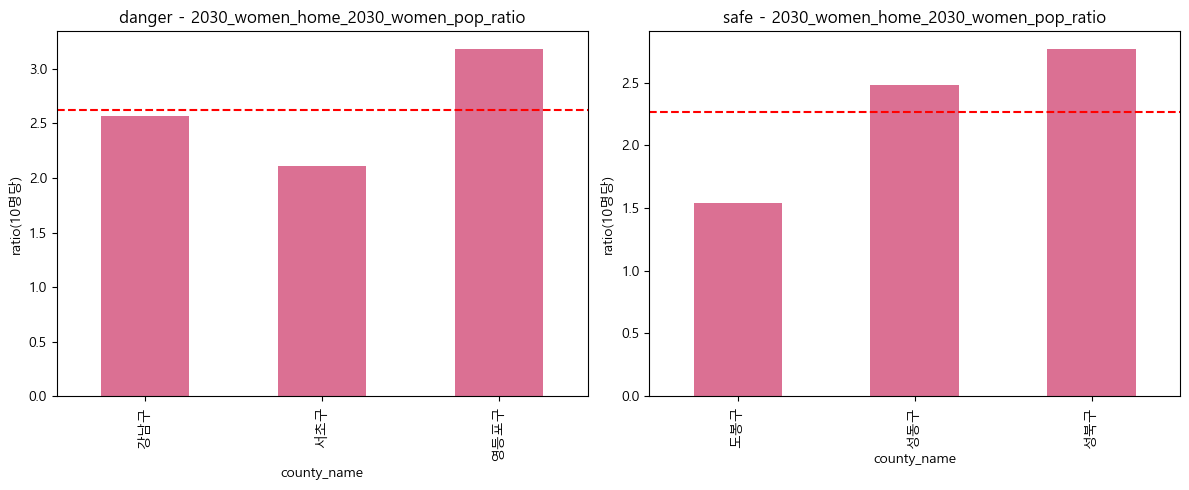

In [107]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

unsafe.plot(kind='bar', x='county_name', y='23w_h1_23women_ratio(10명당)', ax=axes[0], legend=False, color='palevioletred')
axes[0].set_title('danger - 2030_women_home_2030_women_pop_ratio')
axes[0].set_ylabel('ratio(10명당)')

mean_value = unsafe['23w_h1_23women_ratio(10명당)'].mean()
axes[0].axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')

safe.plot(kind='bar', x='county_name', y='23w_h1_23women_ratio(10명당)', ax=axes[1], legend=False, color='palevioletred')
axes[1].set_title('safe - 2030_women_home_2030_women_pop_ratio')
axes[1].set_ylabel('ratio(10명당)')

mean_value = safe['23w_h1_23women_ratio(10명당)'].mean()
axes[1].axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')

plt.tight_layout()
plt.show()

### 1인 가구 ttest 진행

In [333]:
unsafe_t = unsafe[["county_name", "23_h1_23women_ratio(10명당)", "23w_h1_23women_ratio(10명당)"]]
unsafe_t["level"] = "danger"
unsafe_t

C:\Users\82108\AppData\Local\Temp\ipykernel_2368\3348061048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unsafe_t["level"] = "danger"


,county_name,23_h1_23women_ratio(10명당),23w_h1_23women_ratio(10명당),level
0,강남구,4.682445,2.572125,danger
14,서초구,3.989835,2.108393,danger
19,영등포구,6.236442,3.185199,danger


In [335]:
safe_t = safe[["county_name", "23_h1_23women_ratio(10명당)", "23w_h1_23women_ratio(10명당)"]]
safe_t["level"] = "safe"
safe_t

C:\Users\82108\AppData\Local\Temp\ipykernel_2368\3407905406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  safe_t["level"] = "safe"


,county_name,23_h1_23women_ratio(10명당),23w_h1_23women_ratio(10명당),level
9,도봉구,2.992058,1.536550,safe
15,성동구,5.133850,2.479382,safe
16,성북구,5.342567,2.769563,safe


In [336]:
ttest = pd.concat([safe_t, unsafe_t], axis=0)

In [338]:
ttest

,23_h1_23women_ratio(10명당),23w_h1_23women_ratio(10명당),level
9,2.992058,1.536550,safe
15,5.133850,2.479382,safe
16,5.342567,2.769563,safe
0,4.682445,2.572125,danger
14,3.989835,2.108393,danger
19,6.236442,3.185199,danger


In [340]:
ttest.groupby("level")[["23_h1_23women_ratio(10명당)", "23w_h1_23women_ratio(10명당)"]].mean()

,23_h1_23women_ratio(10명당),23w_h1_23women_ratio(10명당)
level,,
danger,4.969574,2.621906
safe,4.489492,2.261832


#### H0 : danger 지역 평균과 safe 지역 평균에 차이가 없다.
#### H1 : danger 지역 평균과 safe 지역 평균에 차이가 있다.

In [341]:
from scipy import stats

test_names = ["23_h1_23women_ratio(10명당)", "23w_h1_23women_ratio(10명당)"]

danger = ttest[ttest['level'] == 'danger'][["23_h1_23women_ratio(10명당)", "23w_h1_23women_ratio(10명당)"]]
safe = ttest[ttest['level'] == 'safe'][["23_h1_23women_ratio(10명당)", "23w_h1_23women_ratio(10명당)"]]

for test_name in test_names:
    _, p_value_levene = stats.levene(danger[test_name], safe[test_name])
    if p_value_levene > 0.05:
        print(f"{test_name} p-value: {p_value_levene}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value_levene}, 이분산 가정 만족")

23_h1_23women_ratio(10명당) p-value: 0.9682041738245892, 등분산 가정 만족
23w_h1_23women_ratio(10명당) p-value: 0.8837888554892804, 등분산 가정 만족


In [342]:
# 양측검정
t_statistic, p_value = stats.ttest_ind(
    a=safe,
    b=danger,
    alternative="two-sided",    # a < b
    equal_var= True,
)
print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")


p-value: [0.65708744 0.49953036]
귀무 가설 기각: [False False]


In [343]:
# 단측검정
t_statistic, p_value = stats.ttest_ind(
    a=safe,
    b=danger,
    alternative="less",    # a < b
    equal_var= True,
)
print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")


p-value: [0.32854372 0.24976518]
귀무 가설 기각: [False False]


## 인구 (2030 여성) 대비 2030_1인 가구 수 비율
양측 + 단측 검정 둘 다 귀무가설 채택 

-> danger 지역의 평균과 safe 지역의 평균은 같다.

-> danger 지역이라고 인구 2030_1인 가구 수 (2030 여성 인구 수 대비)가 많은 것이 아니다.

## 인구 (2030 여성) 대비 2030_여성_1인 가구 수 비율
양측 + 단측 검정 둘 다 귀무가설 채택 

-> danger 지역의 평균과 safe 지역의 평균은 같다.

-> danger 지역이라고 인구 2030_여성_1인 가구 수 (2030 여성 인구 수 대비)가 많은 것이 아니다.

## 지역내총생산

In [456]:
gdp.head()

,city,county_name,지역내총생산(백만원),구성비(%),1인당 지역내총생산(천원)
0,서울시,종로구,35719537,7.6,238599
1,서울시,중구,61342710,13.0,481395
2,서울시,용산구,13294640,2.8,58918
3,서울시,성동구,13999893,3.0,48682
4,서울시,광진구,6554954,1.4,18732


#### 자치구 별 - 지역내총생산 & 1인당 순위

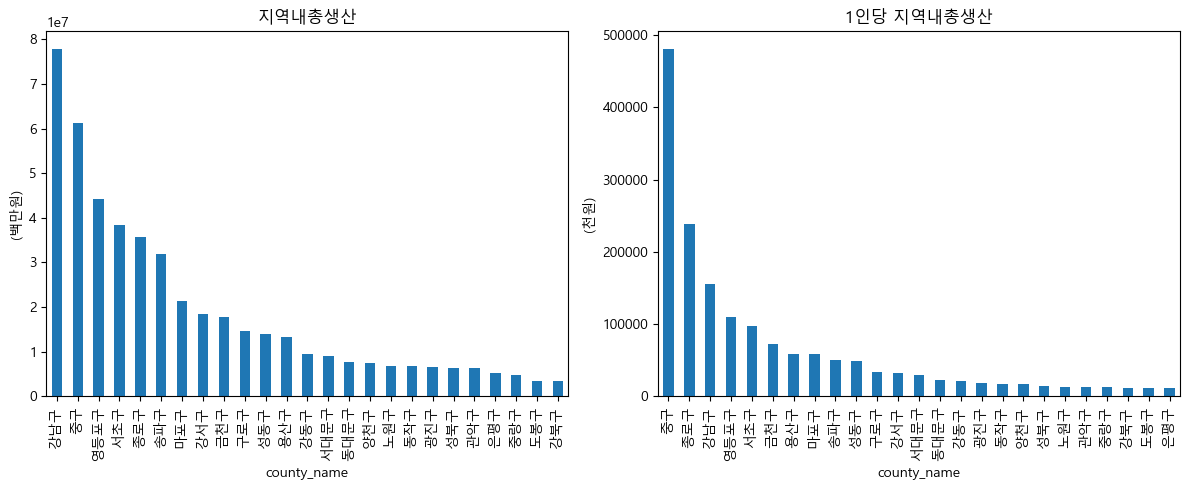

In [457]:
total = gdp.sort_values(by='지역내총생산(백만원)', ascending=False)
per_one = gdp.sort_values(by='1인당 지역내총생산(천원)', ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

total.plot(kind='bar', x='county_name', y='지역내총생산(백만원)', ax=axes[0], legend=False)
axes[0].set_title('지역내총생산')
axes[0].set_ylabel('(백만원)')

per_one.plot(kind='bar', x='county_name', y='1인당 지역내총생산(천원)', ax=axes[1], legend=False)
axes[1].set_title('1인당 지역내총생산')
axes[1].set_ylabel('(천원)')

plt.tight_layout()
plt.show()

In [458]:
unsafe = per_one[(per_one["county_name"] == "강남구") | (per_one["county_name"] == "서초구") | (per_one["county_name"] == "영등포구")]
unsafe

,city,county_name,지역내총생산(백만원),구성비(%),1인당 지역내총생산(천원)
22,서울시,강남구,77924019,16.5,155358
18,서울시,영등포구,44265877,9.4,109100
21,서울시,서초구,38335706,8.1,96783


In [459]:
safe = per_one[(per_one["county_name"] == "도봉구") | (per_one["county_name"] == "성동구") | (per_one["county_name"] == "성북구")]
safe

,city,county_name,지역내총생산(백만원),구성비(%),1인당 지역내총생산(천원)
3,서울시,성동구,13999893,3.0,48682
7,서울시,성북구,6371894,1.3,14608
9,서울시,도봉구,3490683,0.7,11233


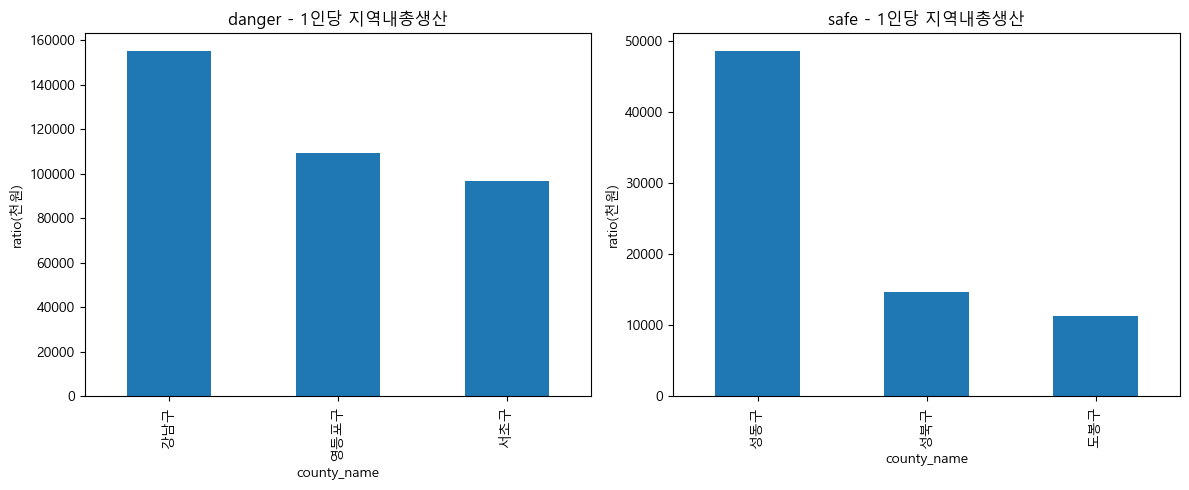

In [463]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

unsafe.plot(kind='bar', x='county_name', y='1인당 지역내총생산(천원)', ax=axes[0], legend=False,)
axes[0].set_title('danger - 1인당 지역내총생산')
axes[0].set_ylabel('ratio(천원)')

safe.plot(kind='bar', x='county_name', y='1인당 지역내총생산(천원)', ax=axes[1], legend=False, )
axes[1].set_title('safe - 1인당 지역내총생산')
axes[1].set_ylabel('ratio(천원)')

plt.tight_layout()
plt.show()

<Axes: ylabel='1인당 지역내총생산(천원)'>

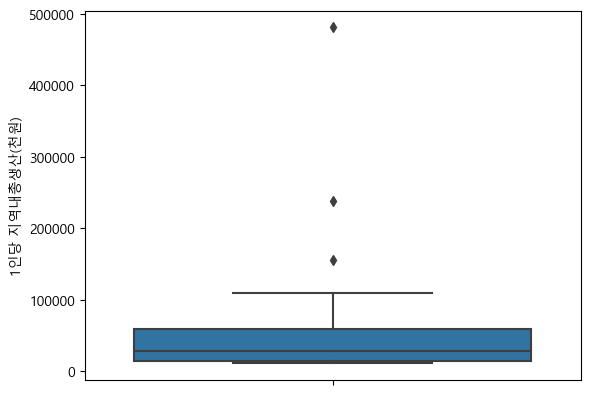

In [464]:
sns.boxplot(data=per_one, y='1인당 지역내총생산(천원)')

#### 범죄율과 상관관계 보기

In [39]:
crime = pd.read_csv("./data/safety/club_pub_county.csv")
crime

,county_name,club_cnt,club_pop_ratio(만 명당),club_area_ratio
0,강남구,350,6.373440,8.861299
1,강동구,176,3.831176,7.157270
2,강북구,146,5.078438,6.186334
3,강서구,282,5.012888,6.803057
4,관악구,244,5.063585,8.252062
5,광진구,82,2.445316,4.805771
6,구로구,104,2.650958,5.168239
7,금천구,107,4.704186,8.217793
8,노원구,57,1.146335,1.608392
9,도봉구,62,2.021374,3.002274


In [46]:
df.to_csv("./data/crime_club_corr.csv", index=False)

In [31]:
df = pd.merge(left=df, right=crime, how='inner' , on='county_name')

In [45]:
df = df[["total_crime", "crime_pop_ratio", "h1_2030", "2030_h1_pop_ratio", "club_cnt", "club_pop_ratio", "1인당 지역내총생산(천원)", "지역내총생산(백만원)"]]
df

,total_crime,crime_pop_ratio,h1_2030,2030_h1_pop_ratio,club_cnt,club_pop_ratio,1인당 지역내총생산(천원),지역내총생산(백만원)
0,6947,0.012650,36502,6.646951,350,6.373440,155358,77924019
1,3711,0.008078,24157,5.258506,176,3.831176,20717,9364063
2,2832,0.009851,16815,5.848899,146,5.078438,11754,3462961
3,4663,0.008289,50790,9.028531,282,5.012888,32709,18347568
4,4879,0.010125,96439,20.013406,244,5.063585,12792,6347562
5,3619,0.010792,39617,11.814156,82,2.445316,18732,6554954
6,3857,0.009831,26090,6.650336,104,2.650958,34144,14663398
7,2577,0.011330,24592,10.811714,107,4.704186,71770,17801015
8,3896,0.007835,20316,4.085778,57,1.146335,13331,6728358
9,2141,0.006980,11076,3.611088,62,2.021374,11233,3490683


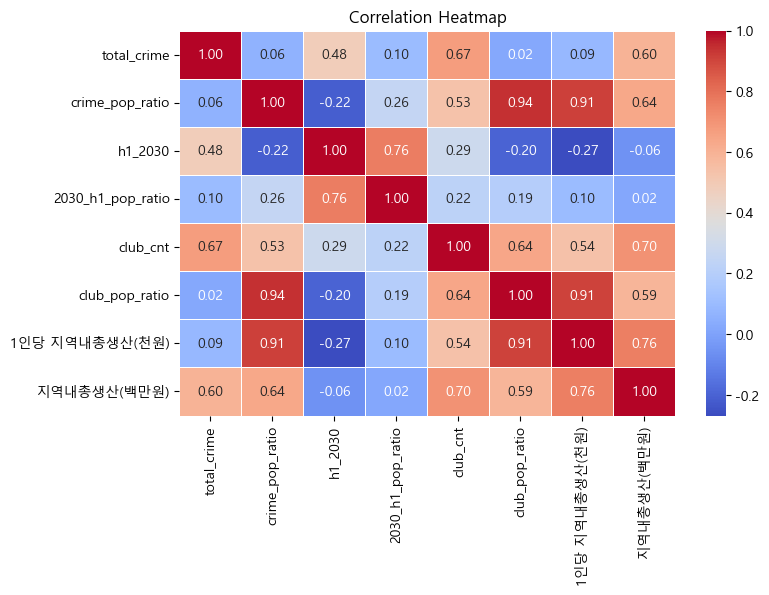

In [47]:
correlation_matrix = df.corr()

plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

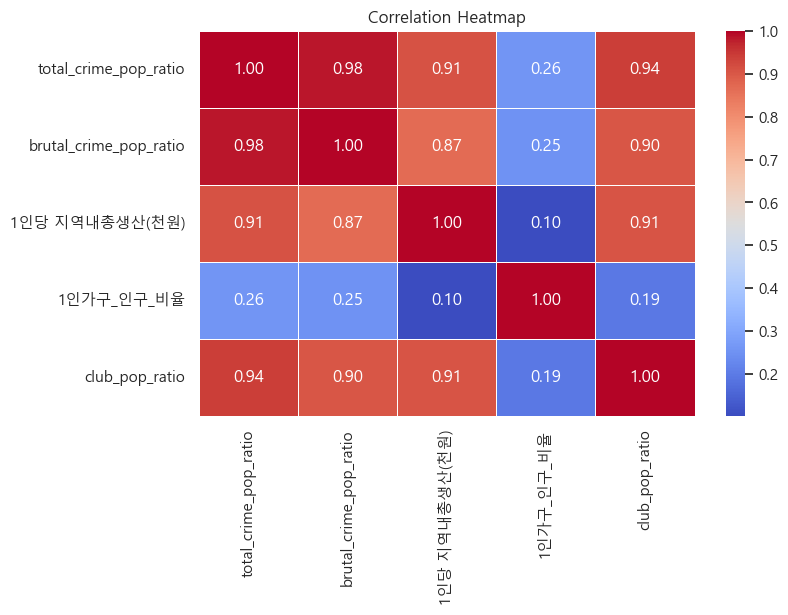

In [429]:
correlation_matrix = only_ratio.corr()

plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [190]:
county_df = pd.DataFrame({
    'county': ['강남구', '서초구', '송파구', '강북구'],
    'crime_ratio': [0.1, 0.2, 0.15, 0.05]
})

# 가상의 데이터프레임 생성 (town 정보가 있는 데이터프레임)
town_df = pd.DataFrame({
    'county': ['강남구', '강남구', '서초구', '송파구', '송파구', '강북구'],
    'town': ['삼성동', '역삼동', '서초동', '잠실동', '가락동', '수유동'],
    'club_ratio': [0.3, 0.25, 0.2, 0.35, 0.3, 0.1],
    'cctv_ratio': [0.25, 0.2, 0.3, 0.15, 0.2, 0.1]
})

# 두 데이터프레임을 병합
merged_df = pd.merge(county_df, town_df, on='county')

# 각 비율에 대한 가중평균 계산
merged_df['weighted_score'] = (
    0.35 * merged_df['club_ratio'] +
    0.35 * merged_df['cctv_ratio'] +
    0.3 * merged_df['crime_ratio']
)

# 안전도에 대한 순위 계산
merged_df['safety_rank'] = merged_df['weighted_score'].rank(ascending=False)

# 결과 확인
print(merged_df[['county', 'town', 'safety_rank']])

  county town  safety_rank
0    강남구  삼성동          2.0
1    강남구  역삼동          5.0
2    서초구  서초동          1.0
3    송파구  잠실동          3.5
4    송파구  가락동          3.5
5    강북구  수유동          6.0
